In [1]:
#import libraires

#Data  analysis 
import pandas as pd 
import numpy as np

#Data Visualisation
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline
import missingno as msno

#Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler #helpss normalise your data btw 0 n 1

#Classifier library...ML Lib..ML algorithms
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier

from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#Machine and Evaluation for Customer Segmentation
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.metrics import silhouette_score, homogeneity_score

#Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix



#warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load data 

df = pd.read_csv(r"C:\Users\Windows\Downloads\bank CProject.csv")
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


In [3]:
#I Renamed some features/columns for ease of understanding
df.columns = ['age', 'job', 'marital_status', 'education', 'defaulted', 'acct_balance', 'housing_loan',
       'personal_loan', 'mthd_contact', 'day_lcontacted', 'month_lcontacted', 'lcontact_duration_secs', 'campaign_ncontacted', 'pdays',
       'previous_camp_contacts', 'poutcome', 'term_deposit']
df.head(2)

,age,job,marital_status,education,defaulted,acct_balance,housing_loan,personal_loan,mthd_contact,day_lcontacted,month_lcontacted,lcontact_duration_secs,campaign_ncontacted,pdays,previous_camp_contacts,poutcome,term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


### Dataset Overview/Data understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     45211 non-null  int64 
 1   job                     45211 non-null  object
 2   marital_status          45211 non-null  object
 3   education               45211 non-null  object
 4   defaulted               45211 non-null  object
 5   acct_balance            45211 non-null  int64 
 6   housing_loan            45211 non-null  object
 7   personal_loan           45211 non-null  object
 8   mthd_contact            45211 non-null  object
 9   day_lcontacted          45211 non-null  int64 
 10  month_lcontacted        45211 non-null  object
 11  lcontact_duration_secs  45211 non-null  int64 
 12  campaign_ncontacted     45211 non-null  int64 
 13  pdays                   45211 non-null  int64 
 14  previous_camp_contacts  45211 non-null  int64 
 15  po

##### The data consist of 45211 entries, containing both categorical and numerical data types. No missing data.

In [5]:
df.dtypes

age                        int64
job                       object
marital_status            object
education                 object
defaulted                 object
acct_balance               int64
housing_loan              object
personal_loan             object
mthd_contact              object
day_lcontacted             int64
month_lcontacted          object
lcontact_duration_secs     int64
campaign_ncontacted        int64
pdays                      int64
previous_camp_contacts     int64
poutcome                  object
term_deposit              object
dtype: object

In [6]:
df.shape

(45211, 17)

In [7]:
df.columns

Index(['age', 'job', 'marital_status', 'education', 'defaulted',
       'acct_balance', 'housing_loan', 'personal_loan', 'mthd_contact',
       'day_lcontacted', 'month_lcontacted', 'lcontact_duration_secs',
       'campaign_ncontacted', 'pdays', 'previous_camp_contacts', 'poutcome',
       'term_deposit'],
      dtype='object')

##### They are made up of 45,211 rows and 17 columns as seen above

In [8]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211.0,NaN,NaN,NaN,40.93621,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital_status,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
defaulted,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acct_balance,45211.0,NaN,NaN,NaN,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing_loan,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
personal_loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mthd_contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_lcontacted,45211.0,NaN,NaN,NaN,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


#### Insights:
##### The general description of the data shows that the age distribution of the customers is between 18 to 95 year-old, with and average age of 41
##### Majority of them are married, keep a blue collar job and have their highest education level to be secondary school. 
##### As seen above majority of them have housing loan, a few of the have personal loans, while most of them have no term deposit , although their genaral bank balance is between -8,019 and 102,127.
##### The bank is highly unsure of the outcome of their previous campaign, if it was a failure or a success. 
##### The major means of contact the bank using to reach the customers is cellular

In [9]:
df.isnull().sum()

age                       0
job                       0
marital_status            0
education                 0
defaulted                 0
acct_balance              0
housing_loan              0
personal_loan             0
mthd_contact              0
day_lcontacted            0
month_lcontacted          0
lcontact_duration_secs    0
campaign_ncontacted       0
pdays                     0
previous_camp_contacts    0
poutcome                  0
term_deposit              0
dtype: int64

<Axes: >

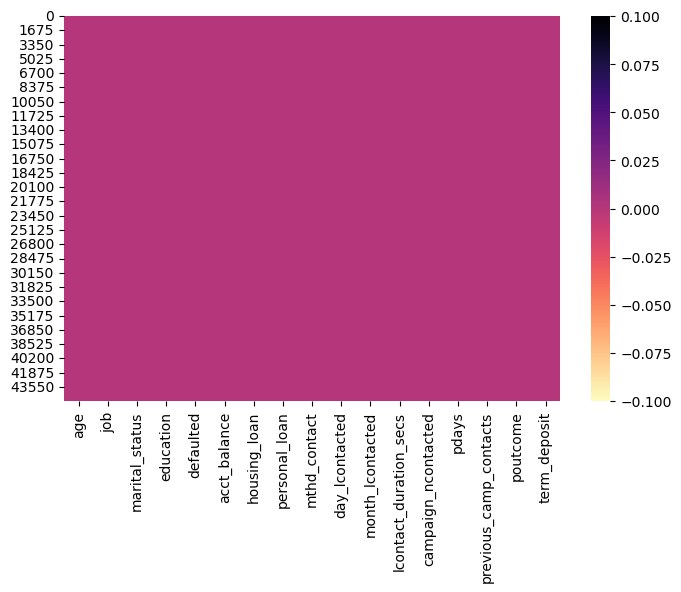

In [10]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cbar=True, cmap="magma_r")

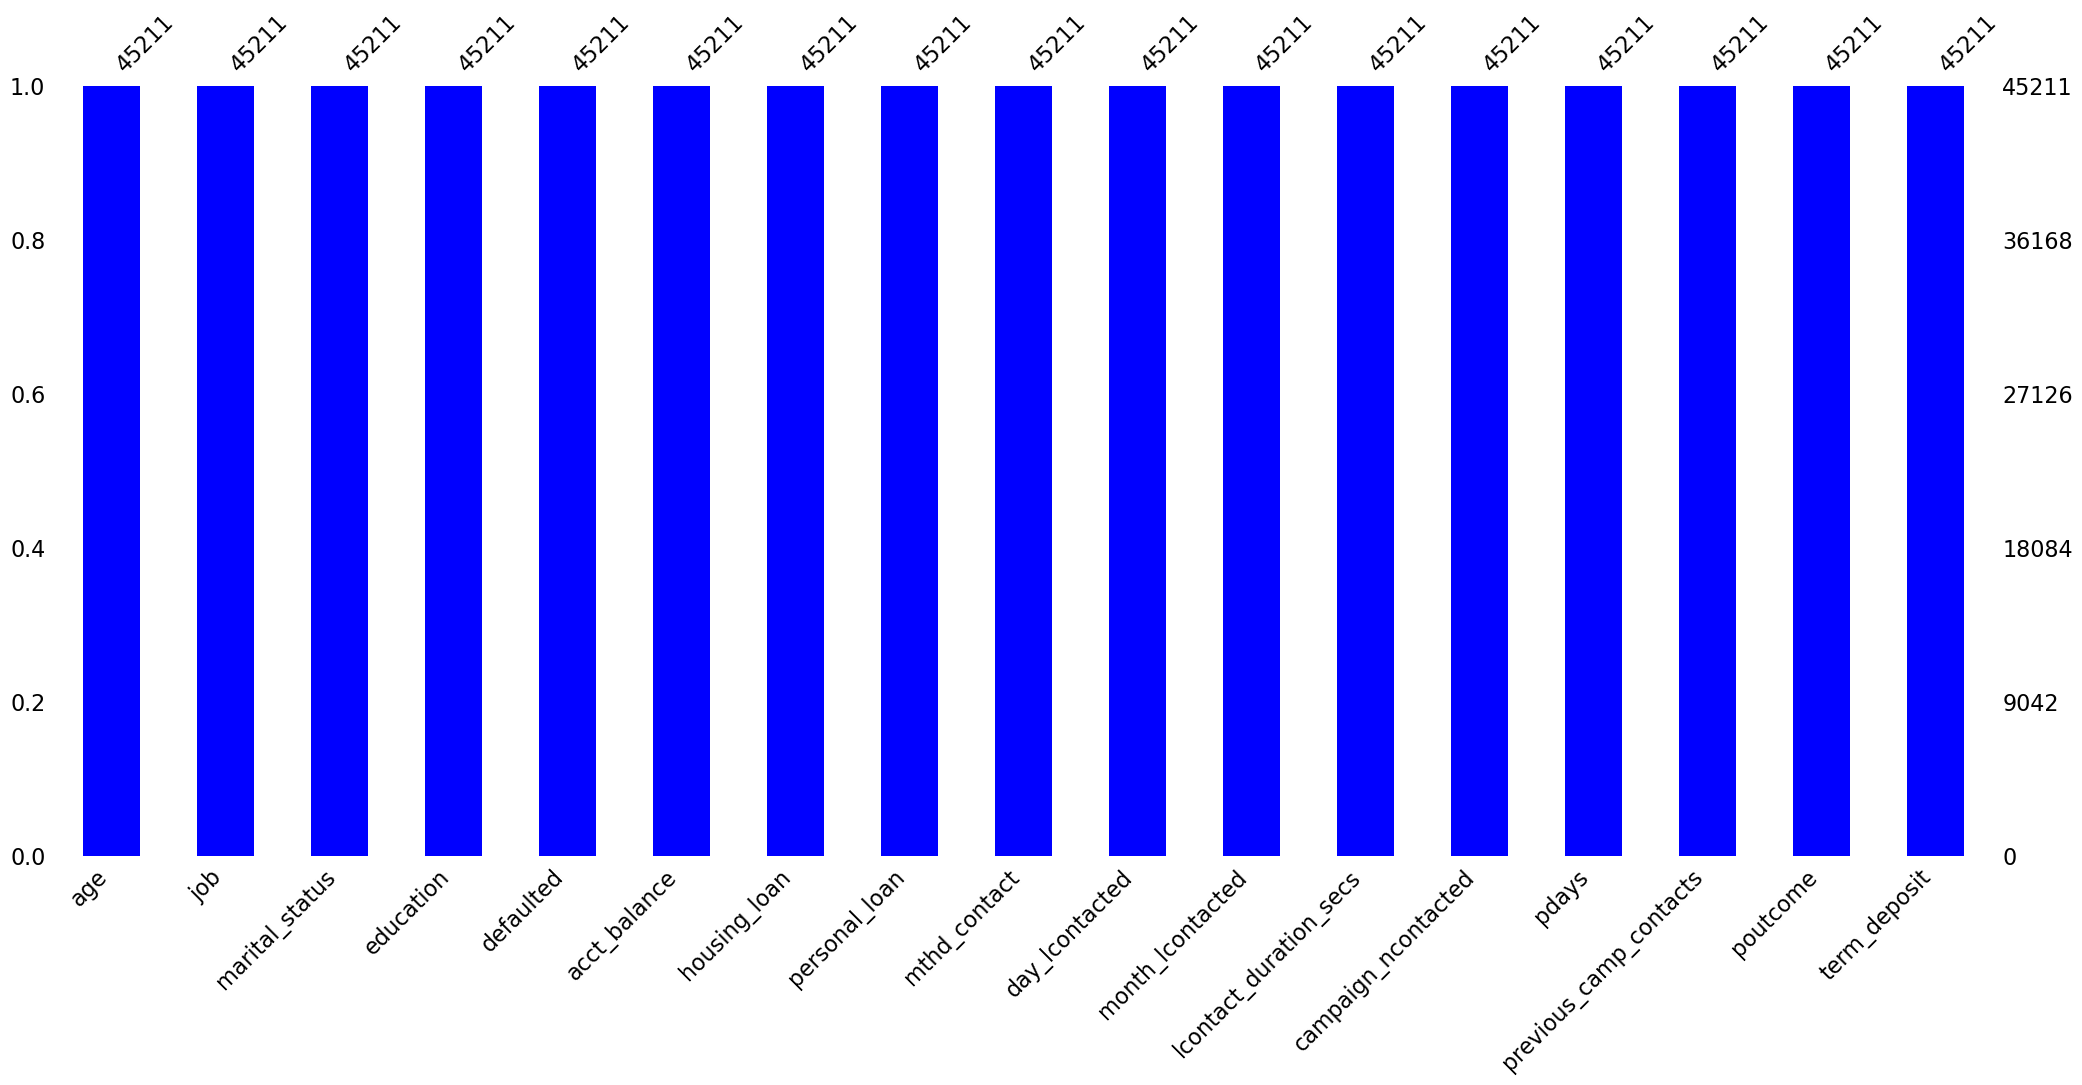

In [11]:
msno.bar(df, color="blue");

##### As visualised above there are no missing data

### Data Preprocessing

In [12]:
#make a copy of the df
df_copy = df.copy()
df_copy.head(2)

,age,job,marital_status,education,defaulted,acct_balance,housing_loan,personal_loan,mthd_contact,day_lcontacted,month_lcontacted,lcontact_duration_secs,campaign_ncontacted,pdays,previous_camp_contacts,poutcome,term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


In [13]:
df.duplicated().sum()

0

##### There are no duplicates in the data

In [14]:
#Creating a new column, age_group


def age_group(x): 
    if x <= 25:
        return "<=25 young adult"
    elif x <= 40:
        return "26-40 adult"
    elif x <= 55:
        return "41-55 old adult"
    elif x <= 70:
        return "56-70 elderly"
    else:
        return ">=71 aged"

df["age_group"] = df["age"].apply(age_group)


#Change the dependent variable term_deposit from "yes" to "subscribed" and "no" to "not subscribed"

df.loc[df["term_deposit"] == "yes", "term_deposit"] = "subscribed"
df.loc[df["term_deposit"] == "no", "term_deposit"] = "not subscribed"


df.head(2)



,age,job,marital_status,education,defaulted,acct_balance,housing_loan,personal_loan,mthd_contact,day_lcontacted,month_lcontacted,lcontact_duration_secs,campaign_ncontacted,pdays,previous_camp_contacts,poutcome,term_deposit,age_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,not subscribed,56-70 elderly
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,not subscribed,41-55 old adult


### EXPLORATORY DATA ANALYSIS -Univariate, Bivariate and Multivariate Analysis are performed below

In [15]:
df.head(2)

,age,job,marital_status,education,defaulted,acct_balance,housing_loan,personal_loan,mthd_contact,day_lcontacted,month_lcontacted,lcontact_duration_secs,campaign_ncontacted,pdays,previous_camp_contacts,poutcome,term_deposit,age_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,not subscribed,56-70 elderly
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,not subscribed,41-55 old adult


### CATEGORICAL  ANALYSIS

### Does Customer's demographic influence the Customer's attitude towards subscribing to a term-deposit?

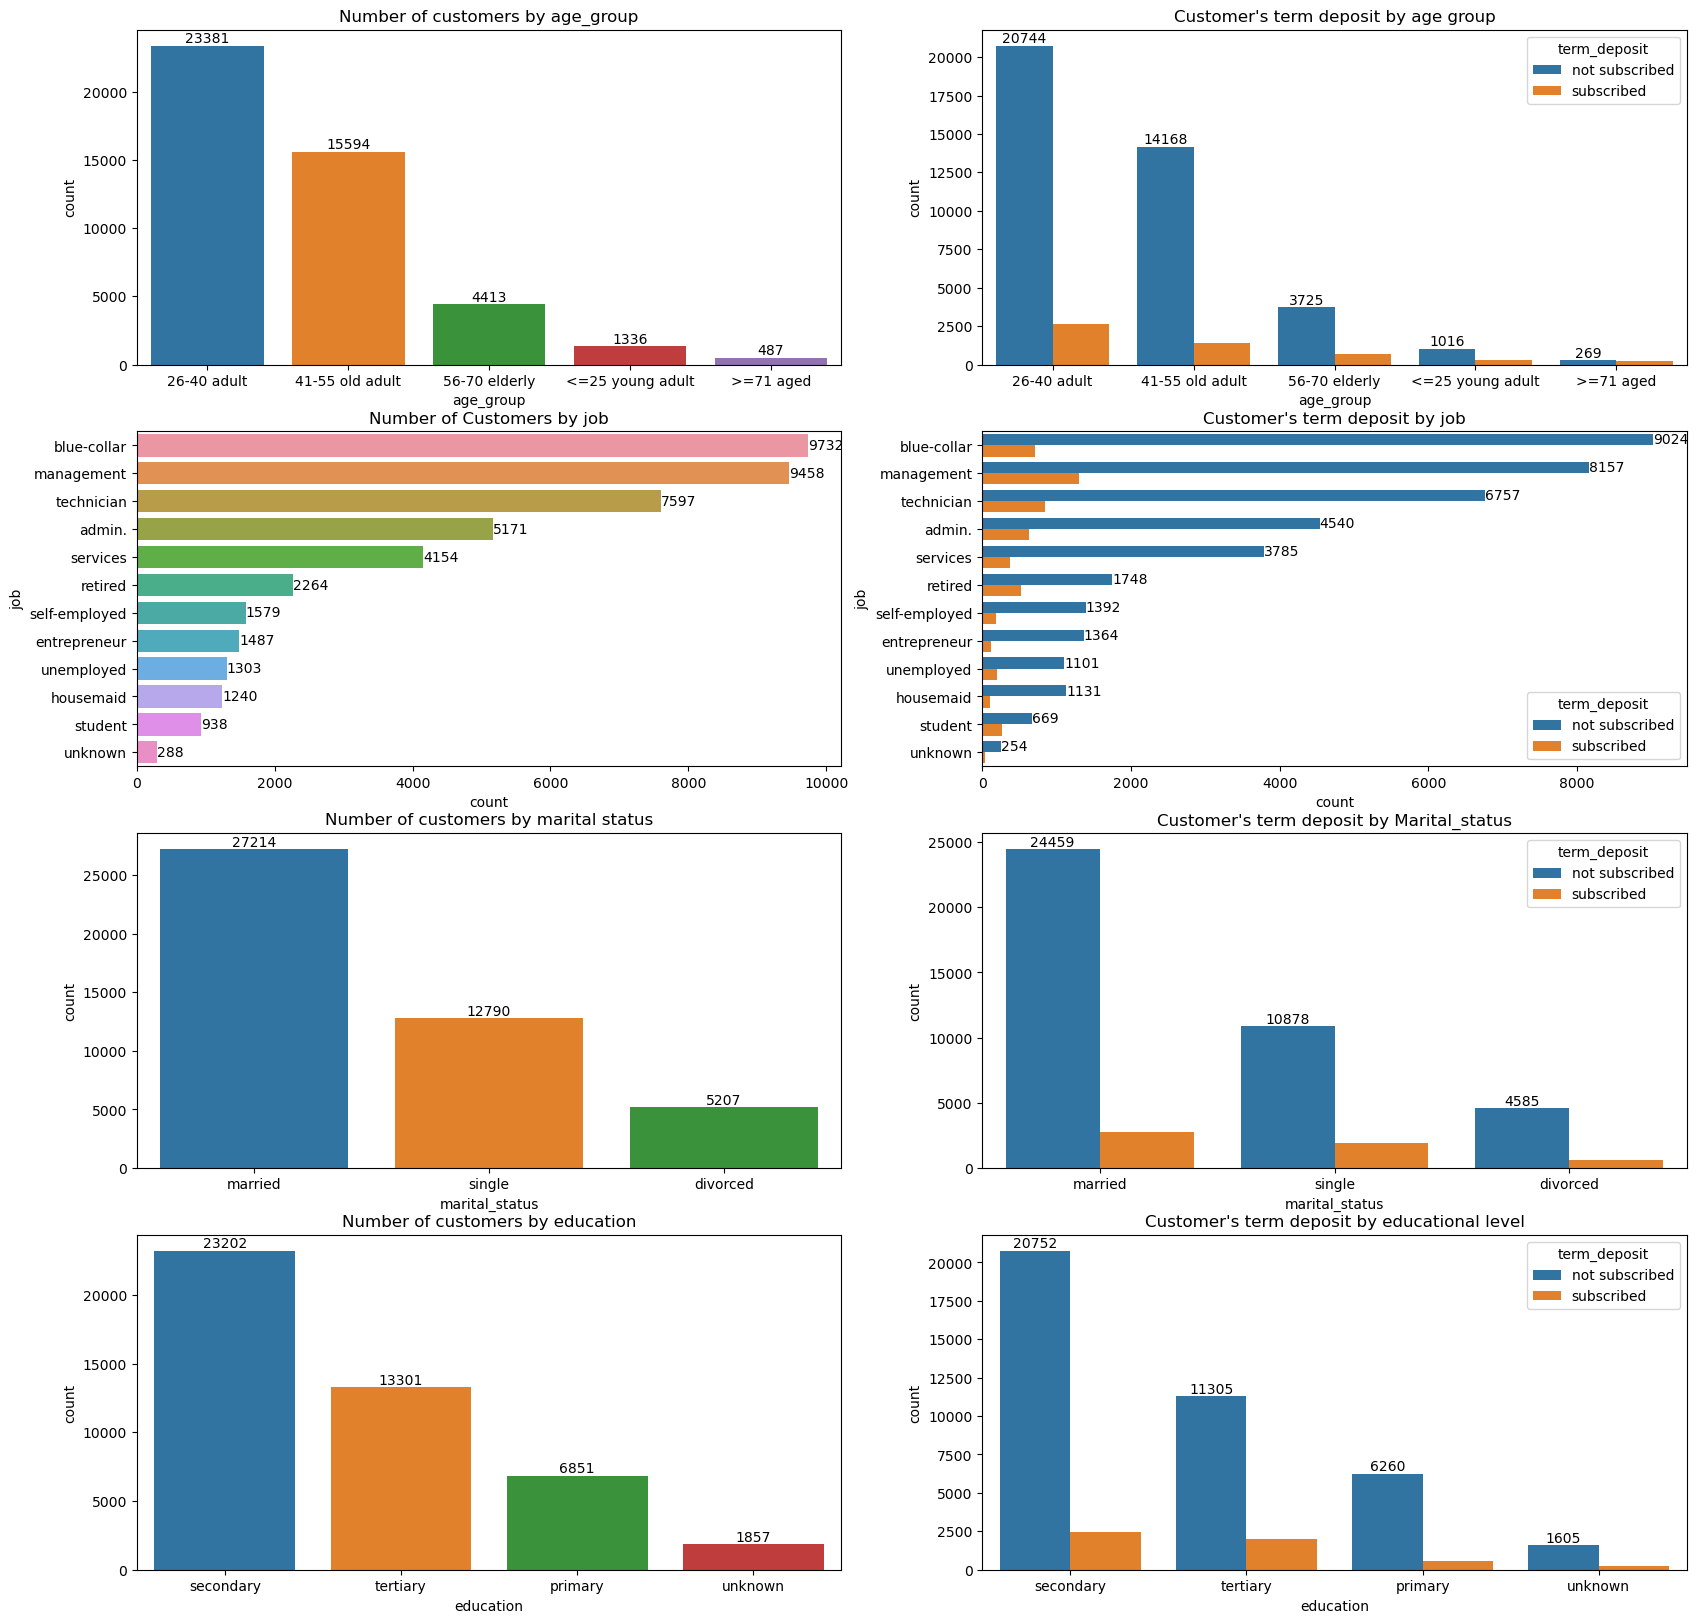

In [16]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))


sns.countplot(data=df, x="age_group", ax=axs[0,0], order=df["age_group"].value_counts(ascending=False).index)
axs[0,0].set_title("Number of customers by age_group")
values = df["age_group"].value_counts
axs[0,0].bar_label(container=axs[0,0].containers[0],label=values, label_type="edge")

ax=sns.countplot(data=df, x="age_group", hue = "term_deposit", ax=axs[0,1], order=df["age_group"].value_counts(ascending=False).index)
axs[0,1].set_title("Customer's term deposit by age group")
values = df["term_deposit"].value_counts
axs[0,1].bar_label(container=axs[0,1].containers[0],label=values, label_type="edge")



sns.countplot(data=df, y="job", ax = axs[1,0], order=df["job"].value_counts(ascending=False).index)
axs[1,0].set_title("Number of Customers by job")
values = df["job"].value_counts
axs[1,0].bar_label(container=axs[1,0].containers[0],label=values, label_type="edge")


ax=sns.countplot(data=df, y="job", hue = "term_deposit", ax=axs[1,1], order=df["job"].value_counts(ascending=False).index)
axs[1,1].set_title("Customer's term deposit by job")
values = df["term_deposit"].value_counts
axs[1,1].bar_label(container=axs[1,1].containers[0],label=values, label_type="edge")


sns.countplot(data=df, x="marital_status", ax=axs[2,0], order=df["marital_status"].value_counts(ascending=False).index)
axs[2,0].set_title("Number of customers by marital status")
values = df["marital_status"].value_counts
axs[2,0].bar_label(container=axs[2,0].containers[0],label=values, label_type="edge")

ax=sns.countplot(data=df, x="marital_status", hue = "term_deposit", ax=axs[2,1], order=df["marital_status"].value_counts(ascending=False).index)
axs[2,1].set_title("Customer's term deposit by Marital_status")
values = df["term_deposit"].value_counts
axs[2,1].bar_label(container=ax.containers[0],label=values, label_type="edge")



sns.countplot(data=df, x="education", ax=axs[3,0],  order=df["education"].value_counts(ascending=False).index)
axs[3,0].set_title("Number of customers by education")
values = df["education"].value_counts
axs[3,0].bar_label(container=axs[3,0].containers[0],label=values, label_type="edge")

ax=sns.countplot(data=df, x="education", hue = "term_deposit", ax=axs[3,1], order=df["education"].value_counts(ascending=False).index)
axs[3,1].set_title("Customer's term deposit by educational level")
values = df["term_deposit"].value_counts
axs[3,1].bar_label(container=axs[3,1].containers[0],label=values, label_type="edge")


plt.show()

#### Insights:
##### Majority of the bank's customers are adult between 26 and 40year-old, 2,500(almost 10%of them) have subscribed to term deposit, but almost 50% of the aged (71year-old and above) have subscribed even though the least in number among the customer base.

#### Most of the customers have blue collar job followed by management and technicians, while the least are either in the students category or their job description is unknown.Those with management job are the highest subscribers to term deposit followed by technicians and blue collar job holders and there are more subscribers who are unemployed compared to the enterpreneurs and housemaids, who are the least subscribers.

#### About(27,214) 60% of the customer base are married, 28% are single and the least of them are divorced. But only about 10% of the married customers have subscribed to term deposit, and they are the highest subscribers to term deposit. 

#### More than half of the customers have secondary as their highest form of education followed by tertiary, both educational level record the highest number of term deposit subscription, with secondary being the highest with a slight difference. 

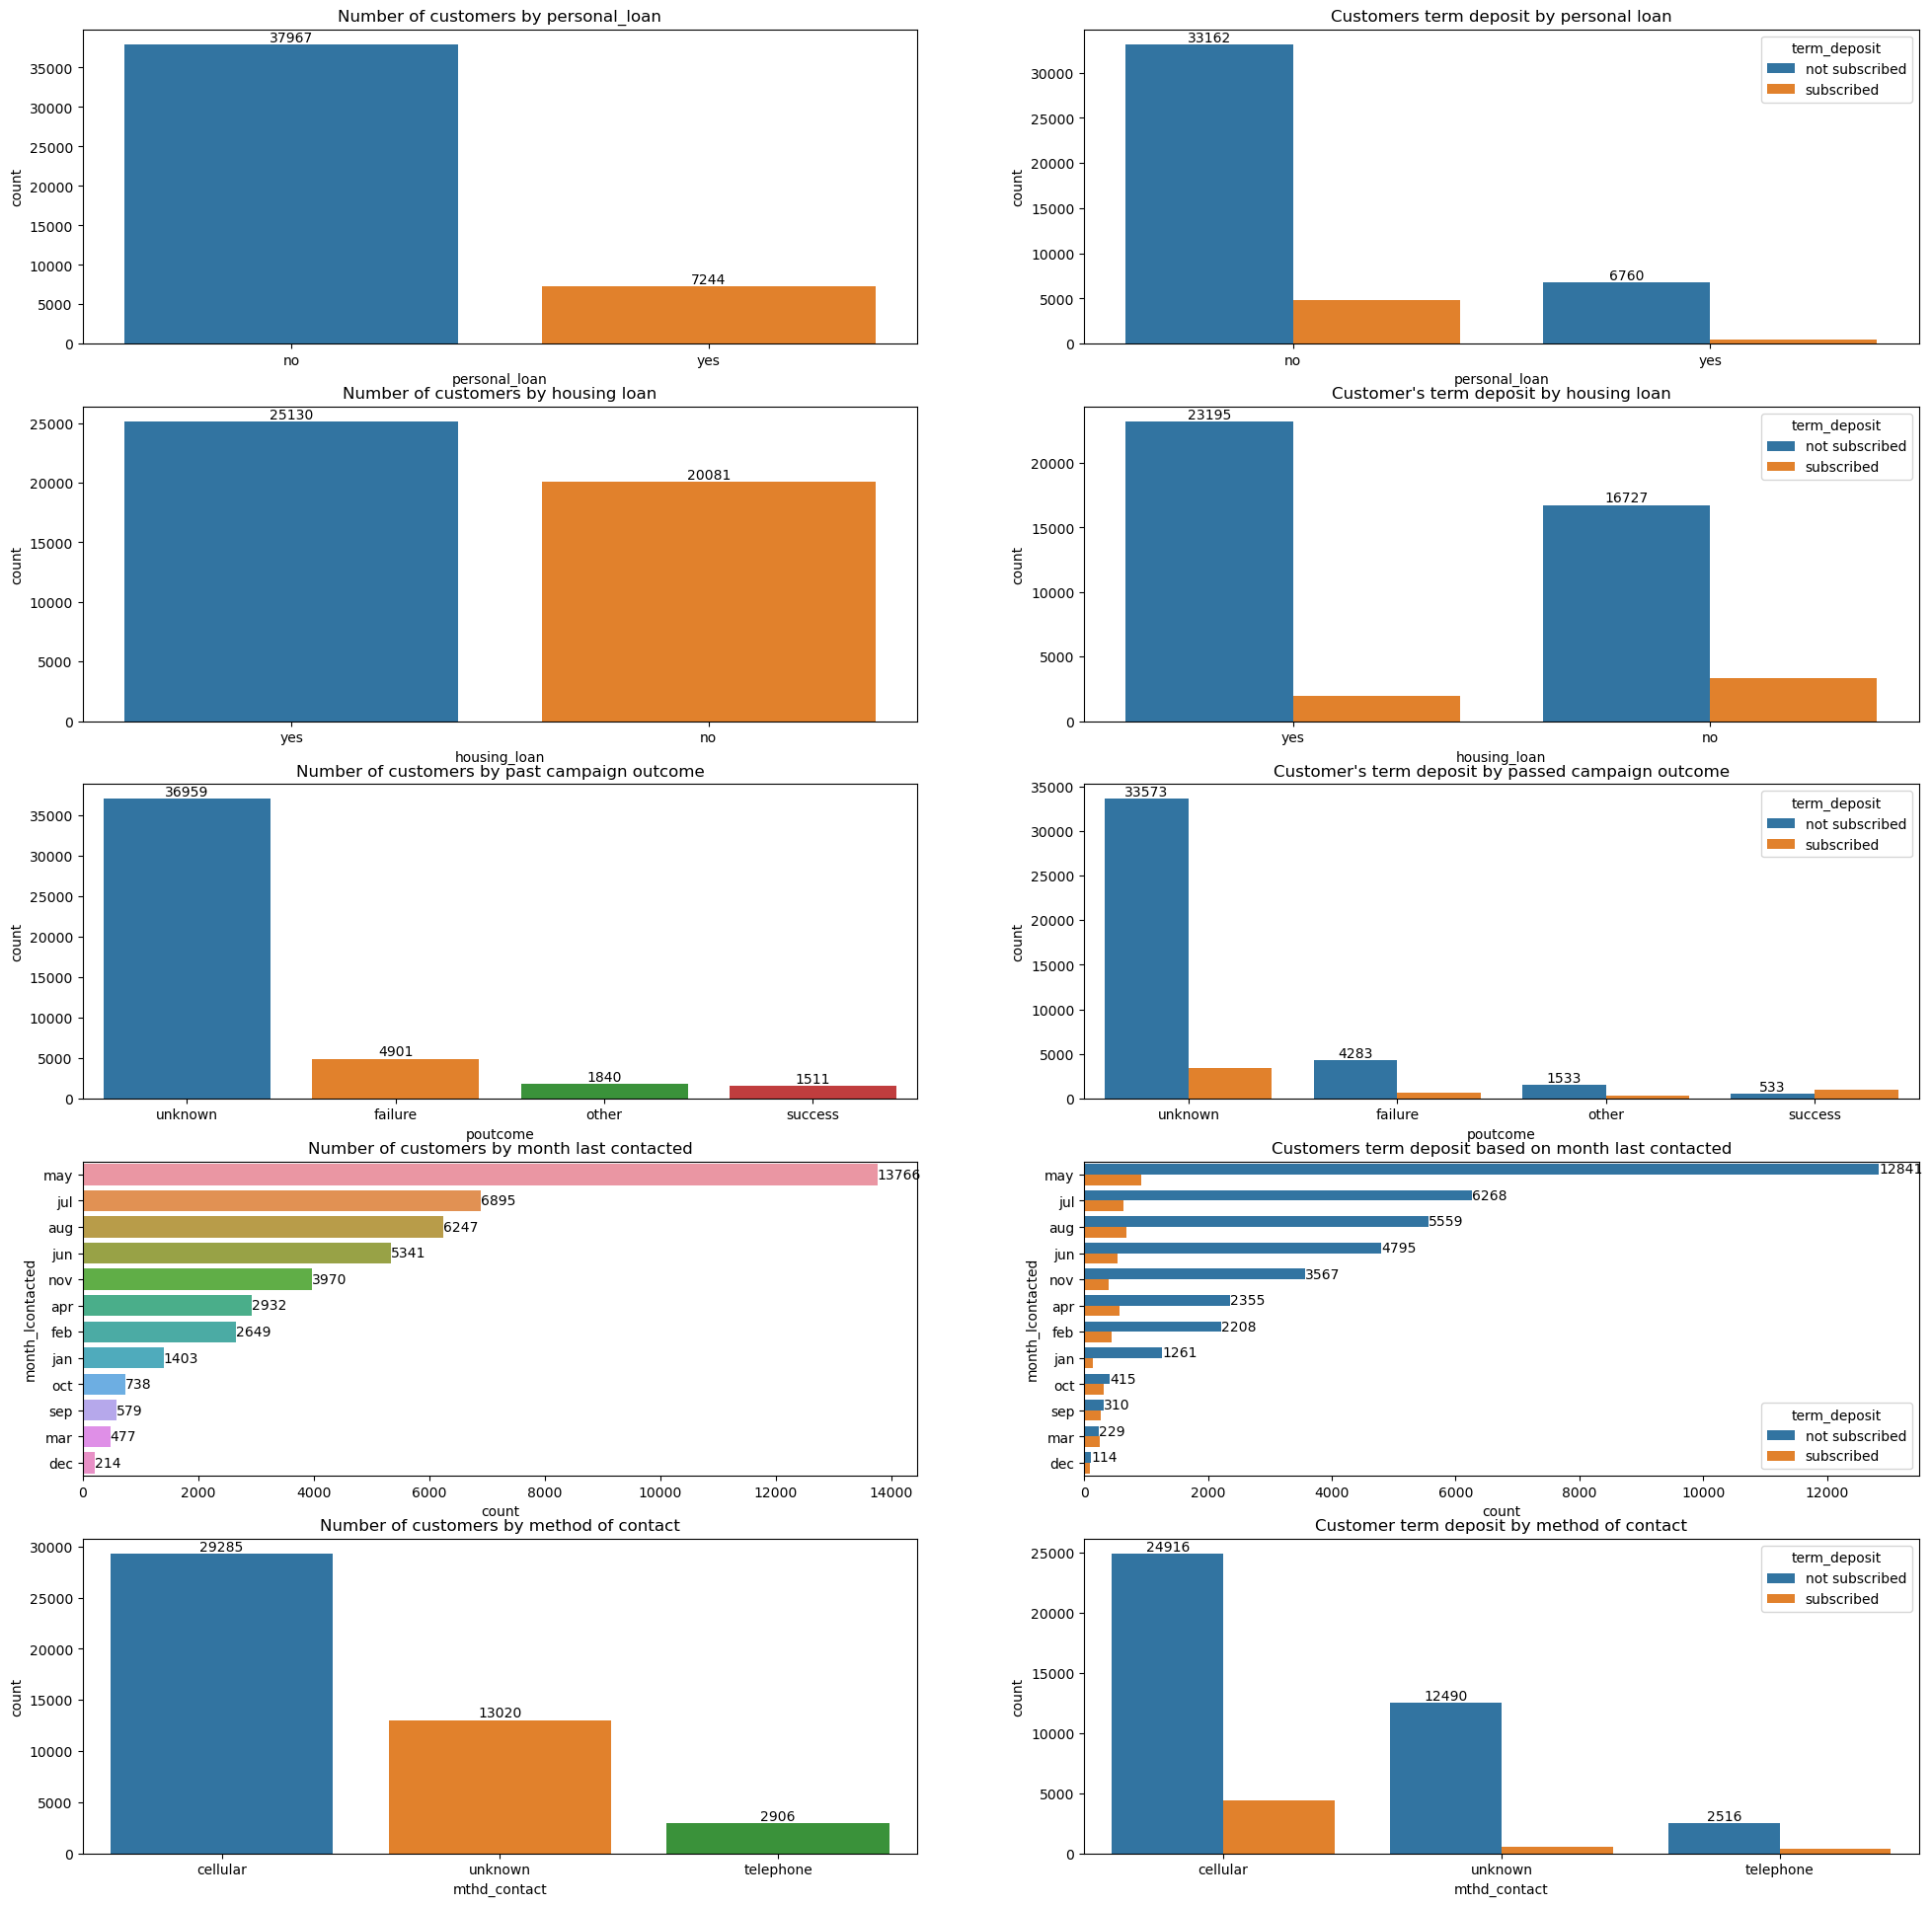

In [17]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(24,24))


sns.countplot(data=df, x="personal_loan", ax=axs[0,0], order=df["personal_loan"].value_counts(ascending=False).index)
axs[0,0].set_title("Number of customers by personal_loan")
values = df["personal_loan"].value_counts
axs[0,0].bar_label(container=axs[0,0].containers[0], label=values, label_type="edge")

ax=sns.countplot(data=df, x="personal_loan", hue = "term_deposit", ax=axs[0,1], order=df["personal_loan"].value_counts(ascending=False).index)
axs[0,1].set_title("Customers term deposit by personal loan")
values = df["term_deposit"].value_counts
axs[0,1].bar_label(container=axs[0,1].containers[0],label=values, label_type="edge")


sns.countplot(data=df, x="housing_loan", ax=axs[1,0], order=df["housing_loan"].value_counts(ascending=False).index)
axs[1,0].set_title("Number of customers by housing loan")
values = df["housing_loan"].value_counts
axs[1,0].bar_label(container=axs[1,0].containers[0], label=values, label_type="edge")

ax=sns.countplot(data=df, x="housing_loan", hue = "term_deposit", ax=axs[1,1], order=df["housing_loan"].value_counts(ascending=False).index)
axs[1,1].set_title("Customer's term deposit by housing loan")
values = df["term_deposit"].value_counts
axs[1,1].bar_label(container=axs[1,1].containers[0],label=values, label_type="edge")


sns.countplot(data=df, x="poutcome", ax=axs[2,0], order=df["poutcome"].value_counts(ascending=False).index )
axs[2,0].set_title("Number of customers by past campaign outcome")
values = df["poutcome"].value_counts
axs[2,0].bar_label(container=axs[2,0].containers[0], label=values, label_type="edge")

ax=sns.countplot(data=df, x="poutcome", hue = "term_deposit", ax=axs[2,1], order=df["poutcome"].value_counts(ascending=False).index)
axs[2,1].set_title("Customer's term deposit by passed campaign outcome")
values = df["term_deposit"].value_counts
axs[2,1].bar_label(container=axs[2,1].containers[0],label=values, label_type="edge")



sns.countplot(data=df, y="month_lcontacted", ax=axs[3,0], order=df["month_lcontacted"].value_counts(ascending=False).index)
axs[3,0].set_title("Number of customers by month last contacted")
values = df["month_lcontacted"].value_counts
axs[3,0].bar_label(container=axs[3,0].containers[0], label=values, label_type="edge")

ax=sns.countplot(data=df, y="month_lcontacted", hue = "term_deposit", ax=axs[3,1], order=df["month_lcontacted"].value_counts(ascending=False).index)
axs[3,1].set_title("Customers term deposit based on month last contacted")
values = df["term_deposit"].value_counts
axs[3,1].bar_label(container=axs[3,1].containers[0],label=values, label_type="edge")


sns.countplot(data=df, x="mthd_contact", ax=axs[4,0], order=df["mthd_contact"].value_counts(ascending=False).index)
axs[4,0].set_title("Number of customers by method of contact")
values = df["mthd_contact"].value_counts
axs[4,0].bar_label(container=axs[4,0].containers[0], label=values, label_type="edge")

ax=sns.countplot(data=df, x="mthd_contact", hue = "term_deposit", ax=axs[4,1], order=df["mthd_contact"].value_counts(ascending=False).index)
axs[4,1].set_title("Customer term deposit by method of contact")
values = df["term_deposit"].value_counts
axs[4,1].bar_label(container=axs[4,1].containers[0],label=values, label_type="edge")


plt.show()




#### Insights:

##### -From the chart above about (7,244) 16% of the customers have personal loan/credit card loan only while 484 of them have both personal loan and have subscribed to term deposit , majority of customers that have subscribed to term deposit do not have personal loan/credit card facility
#### -More than 50%(about 25,130) of the customers have housing loan, out of which about 1,935 have also subscribed to term deposit and about 3,354 who do not have housing loan have subscribed to term deposit.
#### -The result of the the previous marketing campaign showed that majority(80%) of the outcome was unknown, 4901(about 11%) was recorded as failure and the success rate was very low(1511), despite the poor success outcome, only 978 of them actually subscribed for term deposit. I would believe either the rest pick up another of the  bank's product or the means by which they were classified as successful wasn't right. Majority of the subscriber fell under the unknown outcome. 
#### - The bank contacted most(13,766) of their customers in the month of May, followed by July(6,875), August(6,247), and June(5,341) and the least in October(415), September(310), March(477) and December(214). But only less than 15% of customers subscribed to term deposit in the months that recorded the highest contacts while 43-50% of the customers that were contacted in the least months(Oct, Sept, March and Dec) subscribed to term deposit
#### - More that half of the customers have cellular phone as their means of contact with the bank and most customers that have subscribed to term deposit fall in this category


### - Does Customer demographics influence Customer's attitude towards defaulting ?

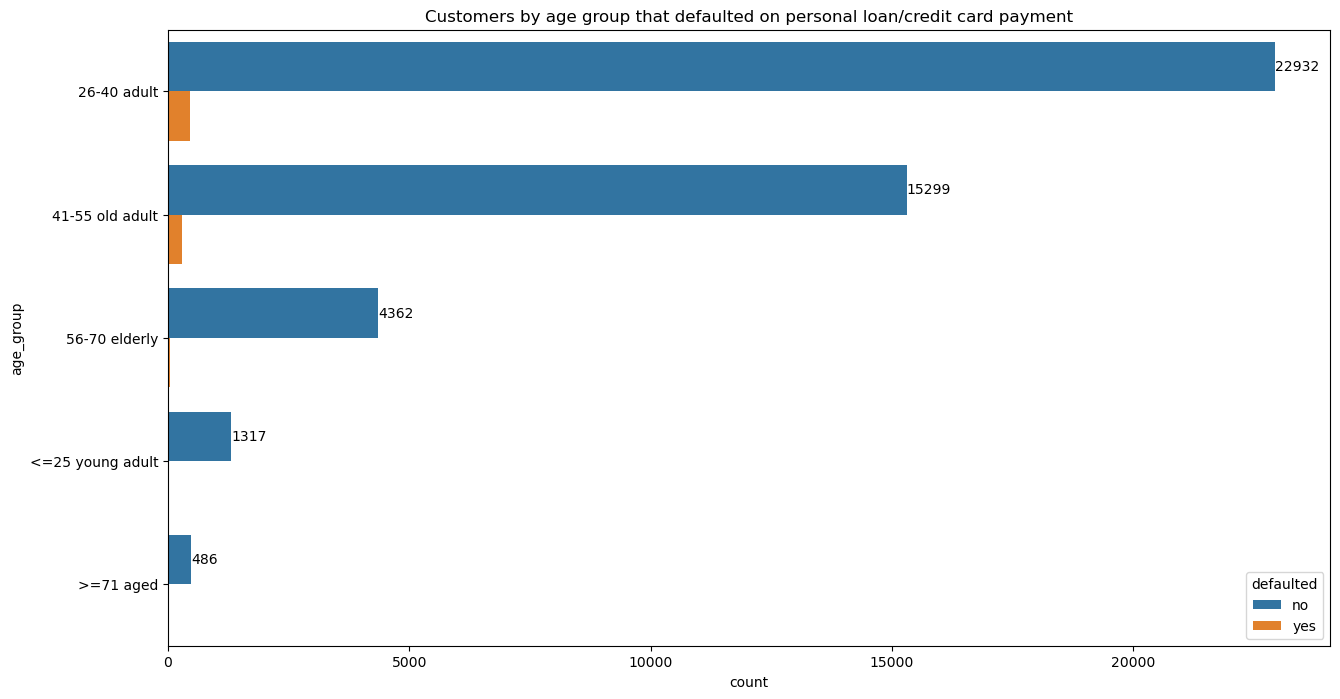

In [18]:
# Bank Customers by age group that defaulted on personal loan/credit card payment
plt.figure(figsize=(15,8))
ax=sns.countplot(data=df, y="age_group", hue = "defaulted", order=df["age_group"].value_counts(ascending=False).index)
plt.title("Customers by age group that defaulted on personal loan/credit card payment")
values = df["defaulted"].value_counts
ax.bar_label(container=ax.containers[0], label=values, label_type="edge")

plt.show()

In [19]:
df["age_group"].value_counts()

26-40 adult         23381
41-55 old adult     15594
56-70 elderly        4413
<=25 young adult     1336
>=71 aged             487
Name: age_group, dtype: int64

#### As earlier mentioned, majority of the customers are in the adult group, that is 26-40year-old and the least is the aged group >=71year-old. But (449) 2% of the adult group, (19) 1.2% of the young adults and (1 )0.2% of the aged have once defaulted in their personal loan/credit card


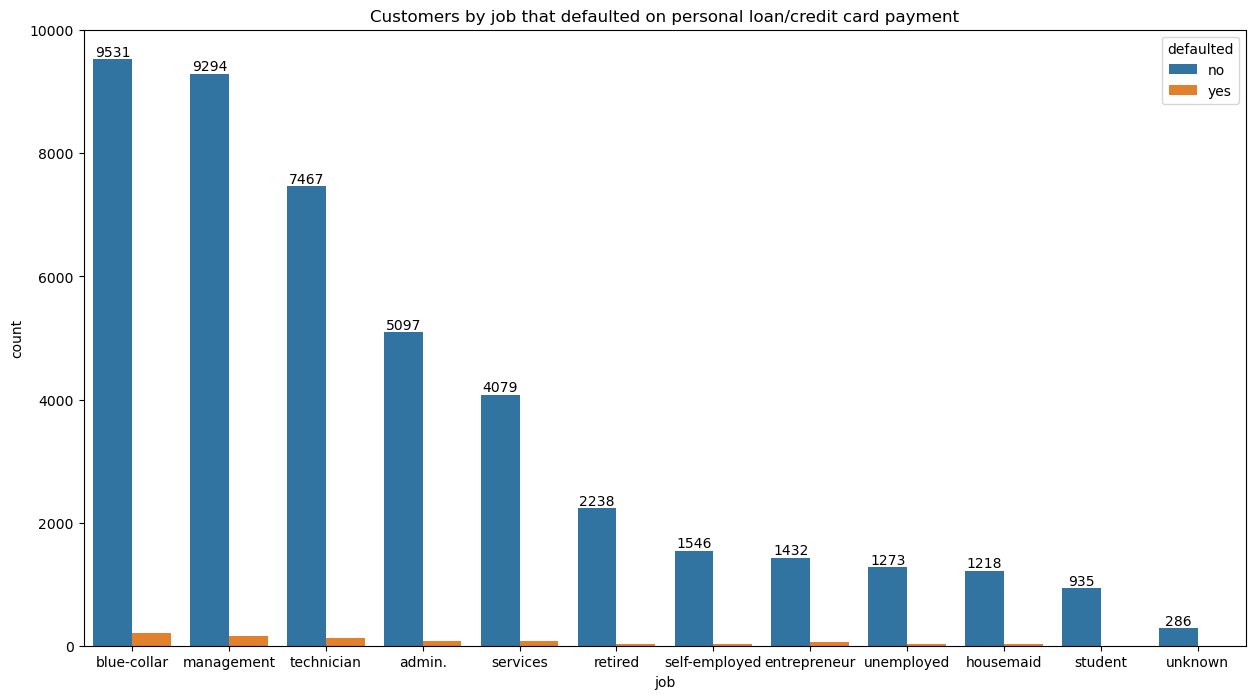

In [20]:
# Bank Customers by job that defaulted on personal loan/credit card payment
plt.figure(figsize=(15,8))
ax=sns.countplot(data=df, x="job", hue = "defaulted", order=df["job"].value_counts(ascending=False).index)
plt.title("Customers by job that defaulted on personal loan/credit card payment")
values = df["defaulted"].value_counts
ax.bar_label(container=ax.containers[0], label=values, label_type="edge")

plt.show()

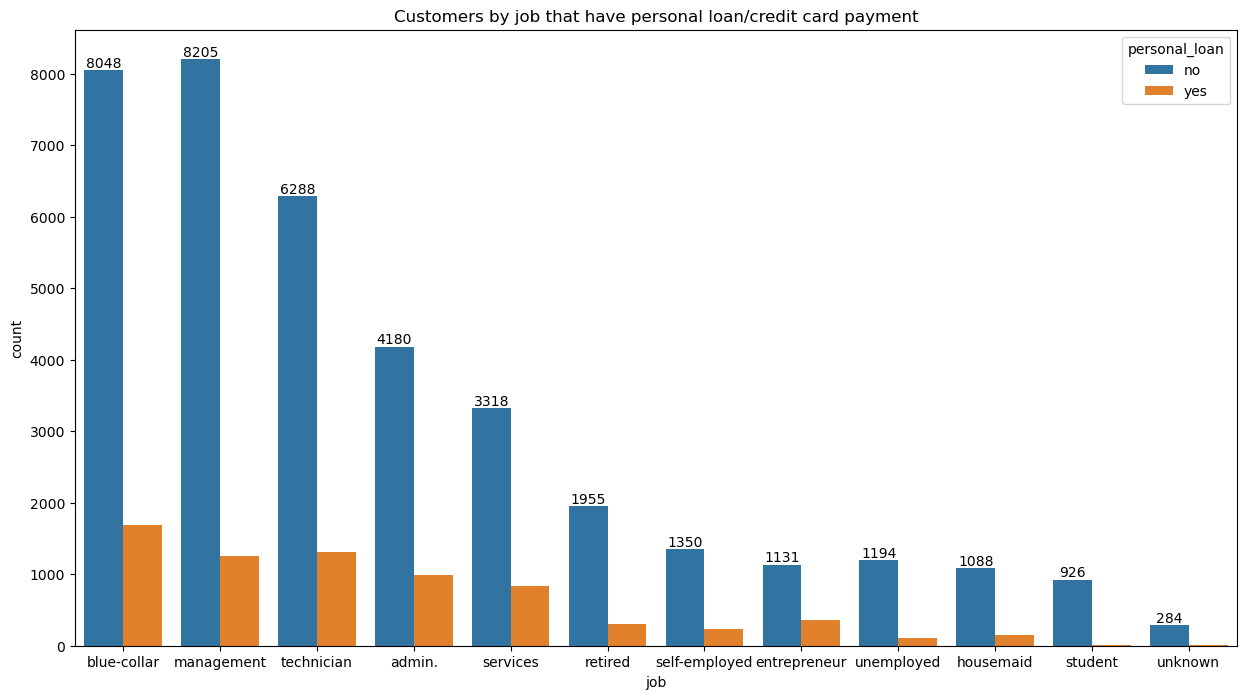

In [21]:
plt.figure(figsize=(15,8))
ax=sns.countplot(data=df, x="job", hue="personal_loan", order=df["job"].value_counts(ascending=False).index)
plt.title("Customers by job that have personal loan/credit card payment")
values = df["defaulted"].value_counts
ax.bar_label(container=ax.containers[0], label=values, label_type="edge")

plt.show()

In [22]:
df["job"].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


#### Looking at the customers in the top 3 jobs, 201 out of 1,684 blue collar job holders with personal loan have defaulted in their loan(approx.12%), about 13% and 10% defaulted in the management and technician category respectively.
#### But contrary to the above the percentage of defaulter were seen to be higher among those that are unemployed and students, having about 28% and 25% of them defaulting. Although the only 12 students were given personal loan.

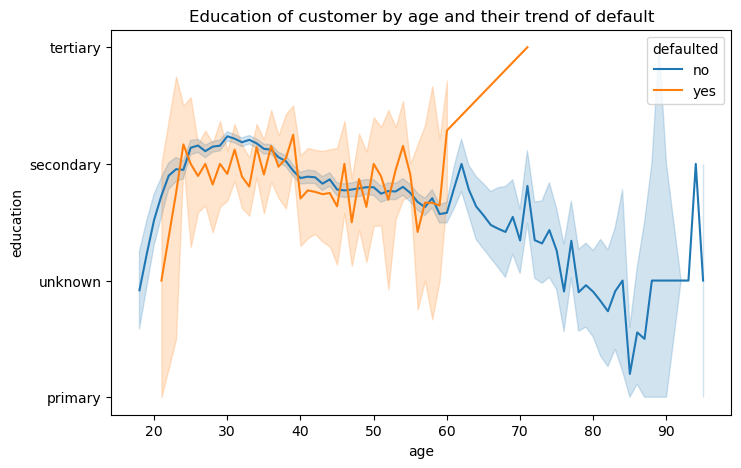

In [23]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df, x="age", y="education", hue="defaulted")
plt.title("Education of customer by age and their trend of default")
plt.show()

### The trend above shows that those above 60 year-old did not default while those between 20 to 60 year-old had defaulted and have their highest form of education as secondary. 


#### 

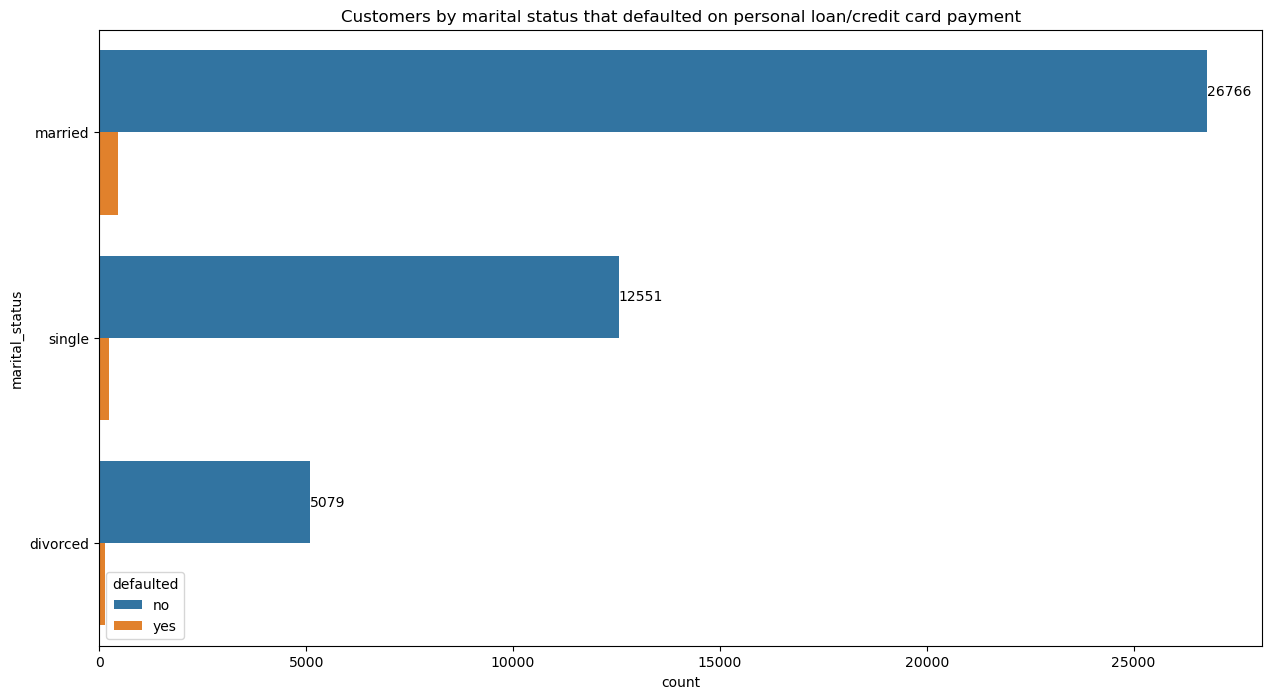

In [24]:
# Bank Customers by marital_status that defaulted on personal loan/credit card payment
plt.figure(figsize=(15,8))
ax=sns.countplot(data=df, y="marital_status", hue = "defaulted", order=df["marital_status"].value_counts(ascending=False).index)
plt.title("Customers by marital status that defaulted on personal loan/credit card payment")
values = df["defaulted"].value_counts
ax.bar_label(container=ax.containers[0], label=values, label_type="edge")

plt.show()

In [25]:
df["marital_status"].value_counts()

married     27214
single      12790
divorced     5207
Name: marital_status, dtype: int64

##### As seen above majority of the loan defaulters are married.

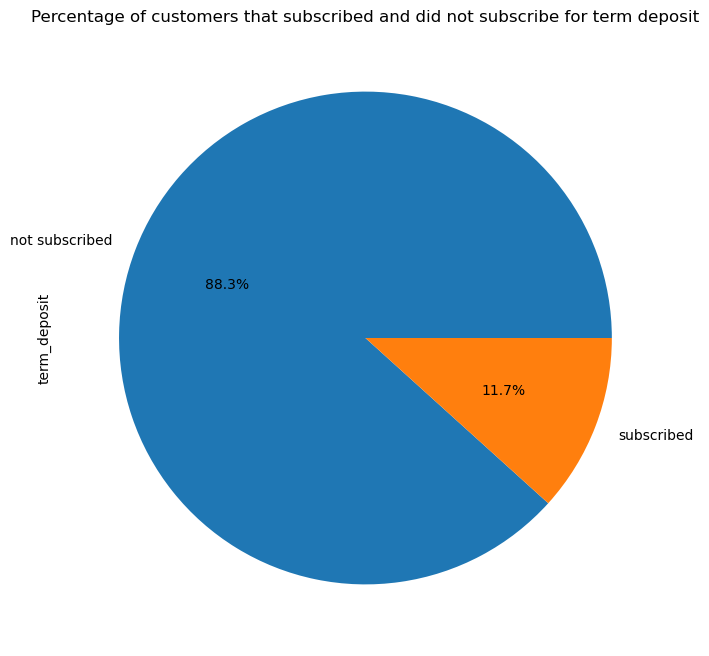

In [26]:
#Percentage of customers that subscribed or did not subscribe to term deposit
plt.figure(figsize=(15, 8))
df["term_deposit"].value_counts().plot.pie(autopct = "%2.1f%%")
plt.title("Percentage of customers that subscribed and did not subscribe for term deposit")
plt.show()

#### Percentage of customers that subscribed to term deposit is 11.7%, and while about 88.3% are not subscribed. The ratio of customers that subscribed to those that did not is small, making the data imbalance. 

In [27]:
df["term_deposit"].value_counts()

not subscribed    39922
subscribed         5289
Name: term_deposit, dtype: int64

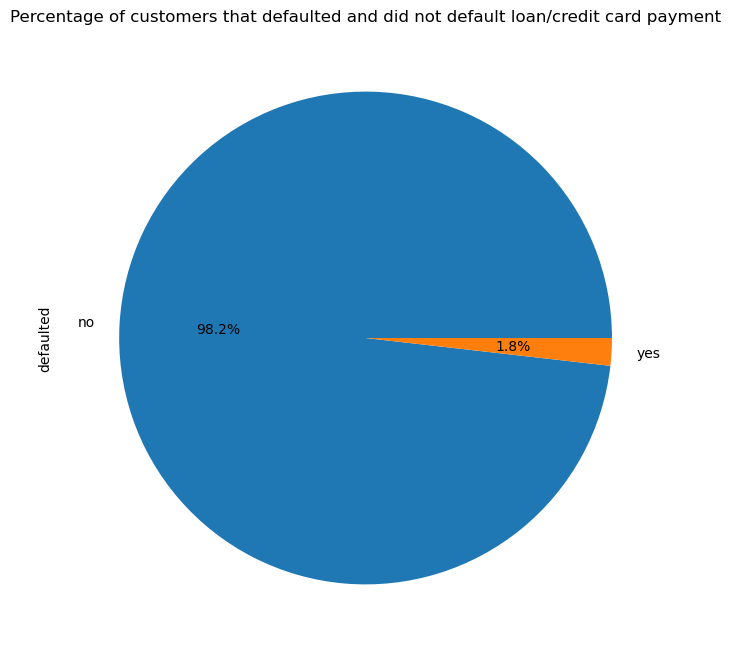

In [28]:
#Percentage of customers that defaulted or have never defaulted payments
plt.figure(figsize=(15, 8))
df["defaulted"].value_counts().plot.pie(autopct = "%2.1f%%")
plt.title("Percentage of customers that defaulted and did not default loan/credit card payment")
plt.show()

 #### -A minute number, about 1.8% of the customers have defaulted in their loan/credit card payments in the past
 

In [29]:
df["defaulted"].value_counts()

no     44396
yes      815
Name: defaulted, dtype: int64

### NUMERICAL ANALYSIS

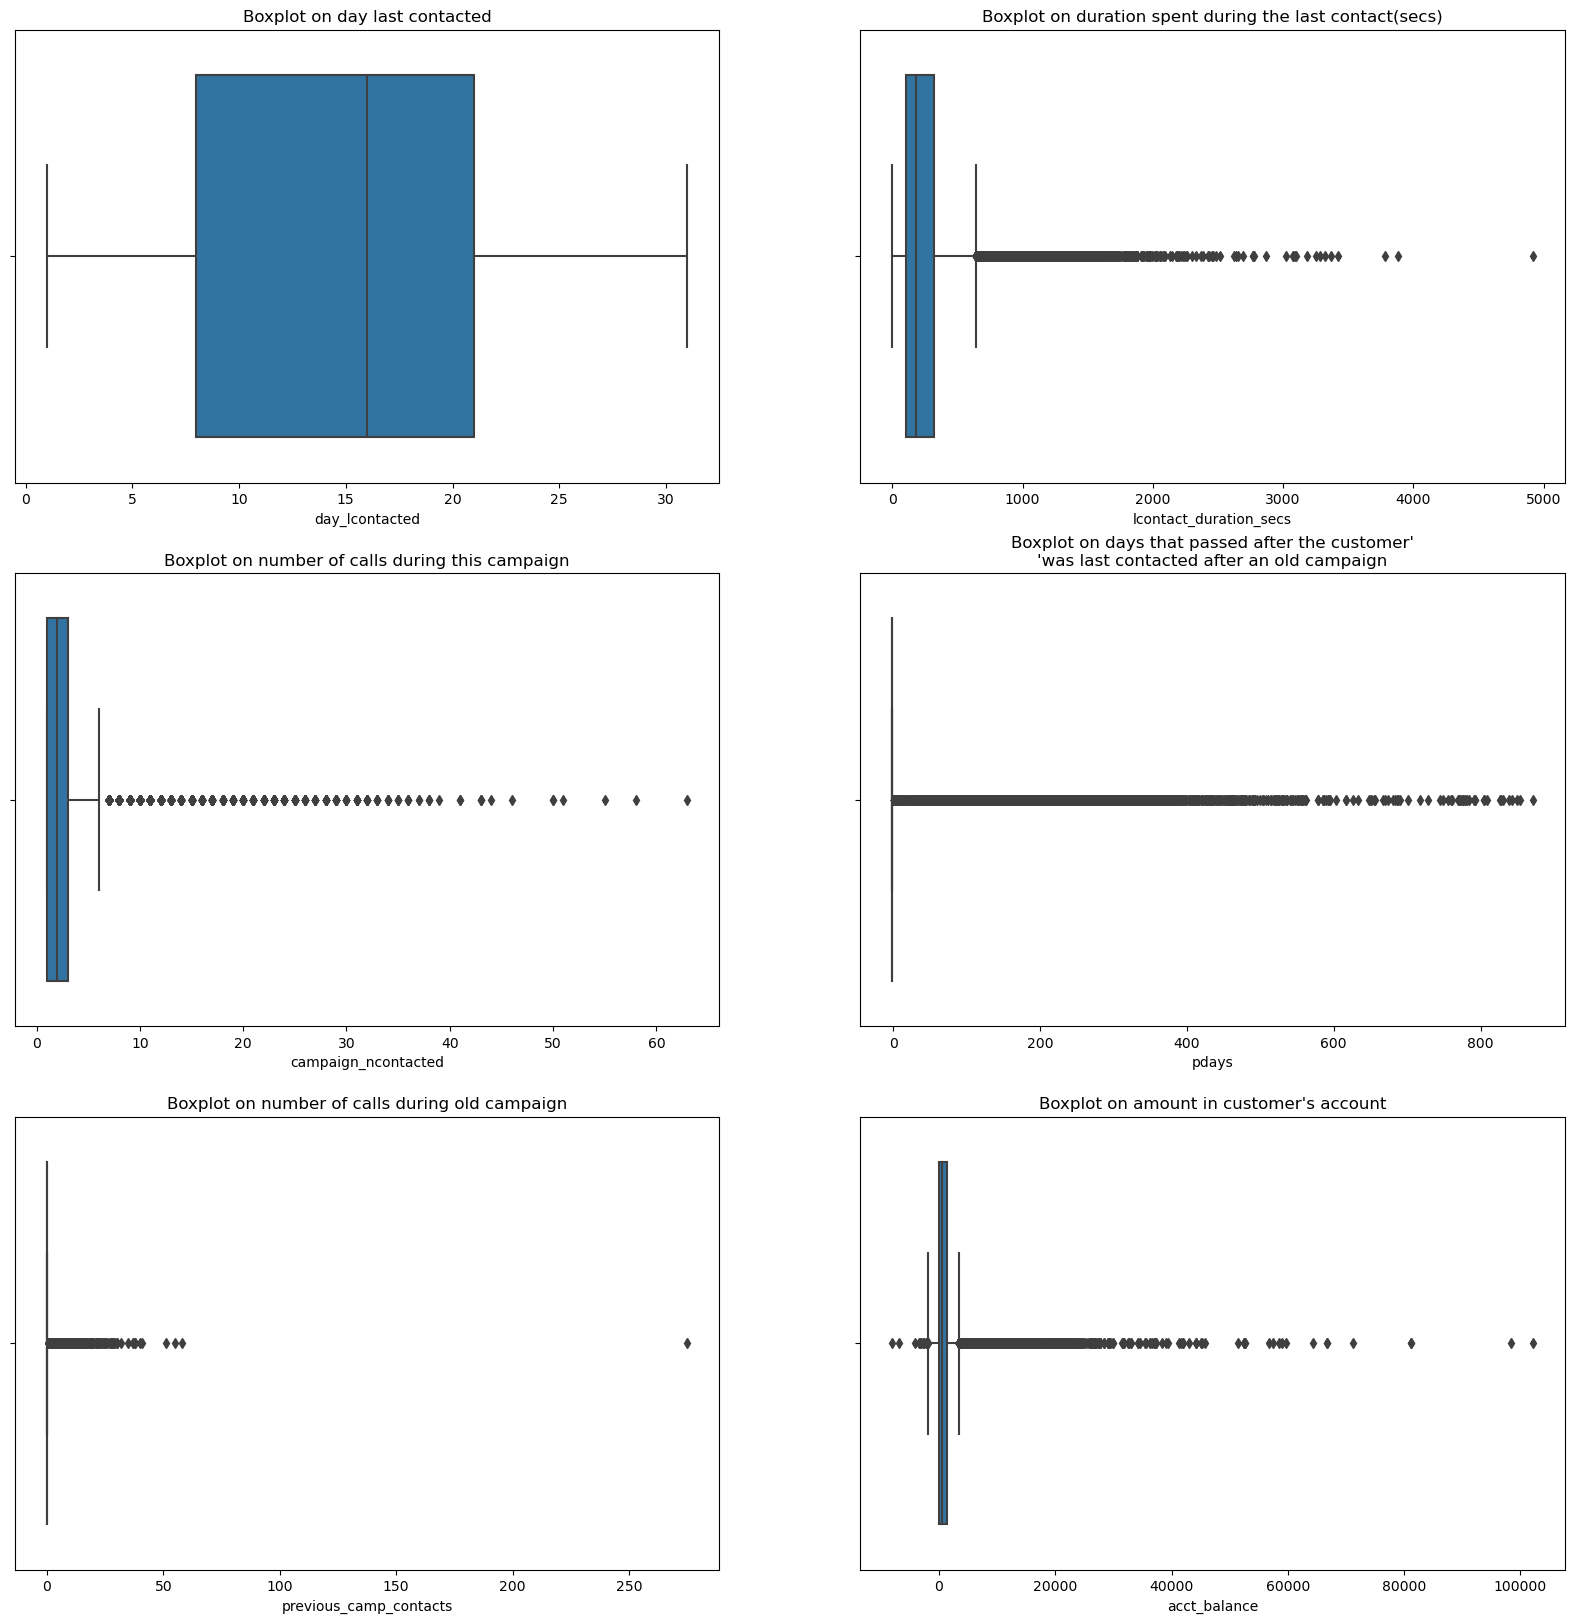

In [30]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20,20))

sns.boxplot(data=df, x="day_lcontacted", ax=axs[0,0])
axs[0,0].set_title("Boxplot on day last contacted");

sns.boxplot(data=df, x="lcontact_duration_secs", ax=axs[0,1])
axs[0,1].set_title("Boxplot on duration spent during the last contact(secs)");

sns.boxplot(data=df, x="campaign_ncontacted", ax=axs[1,0])
axs[1,0].set_title("Boxplot on number of calls during this campaign");

sns.boxplot(data=df, x="pdays", ax=axs[1,1])
axs[1,1].set_title("Boxplot on days that passed after the customer'\n'was last contacted after an old campaign");

sns.boxplot(data=df, x="previous_camp_contacts", ax=axs[2,0])
axs[2,0].set_title("Boxplot on number of calls during old campaign");

sns.boxplot(data=df, x="acct_balance", ax=axs[2,1])
axs[2,1].set_title("Boxplot on amount in customer's account");

plt.show()

#### Insight:
#### There are no outliers on for the day customer was last contacted, while last contact duration, number of calls during last campaign, passed days after the customer was last contacted, number of calls during this campaign, the old campaign and acount balance all have outliers. The outliers will be removed by normalisation before building the model.

### CORRELATION/MULTIVARIATE ANALYSIS

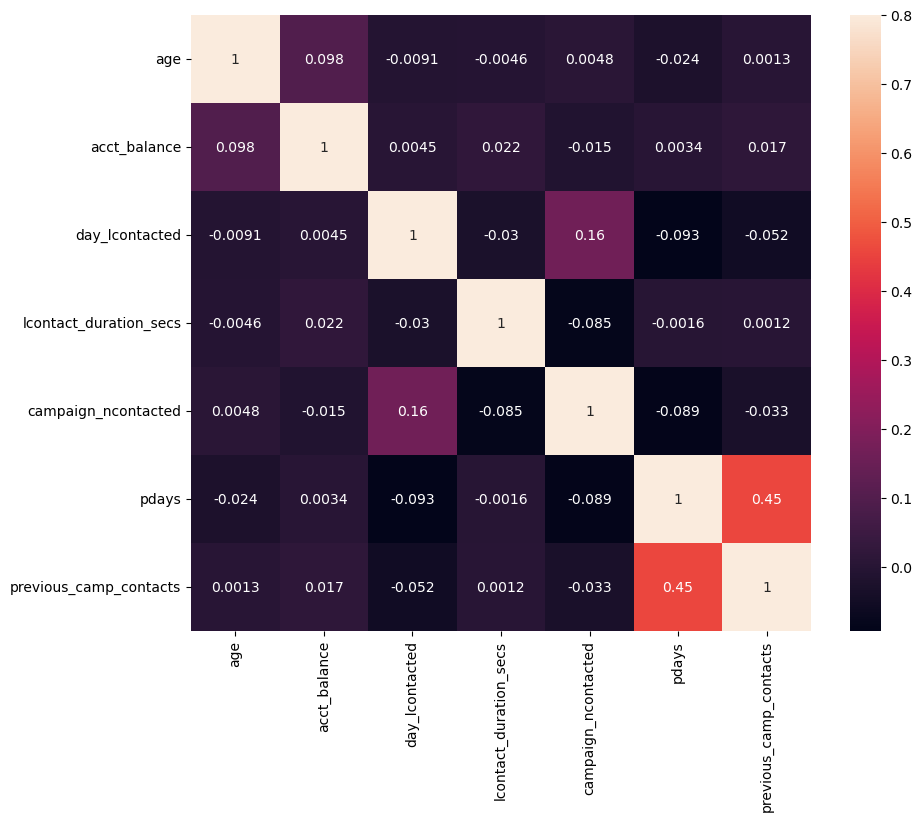

In [31]:
a= df.corr()
f,ax= plt.subplots(figsize=(10,8))
sns.heatmap(a, vmax=.8, cbar=True, annot=True);

In [ ]:
#### Insights:
#### From the heatmap above, we can see that there is a positive relationship between
#### - Days that passed after the customer was last contacted from previous campaign and number of calls made before this campaign 
#### - Day of the month when customer was last contacted and number of calls made in this campaign
#### - Account balance and age


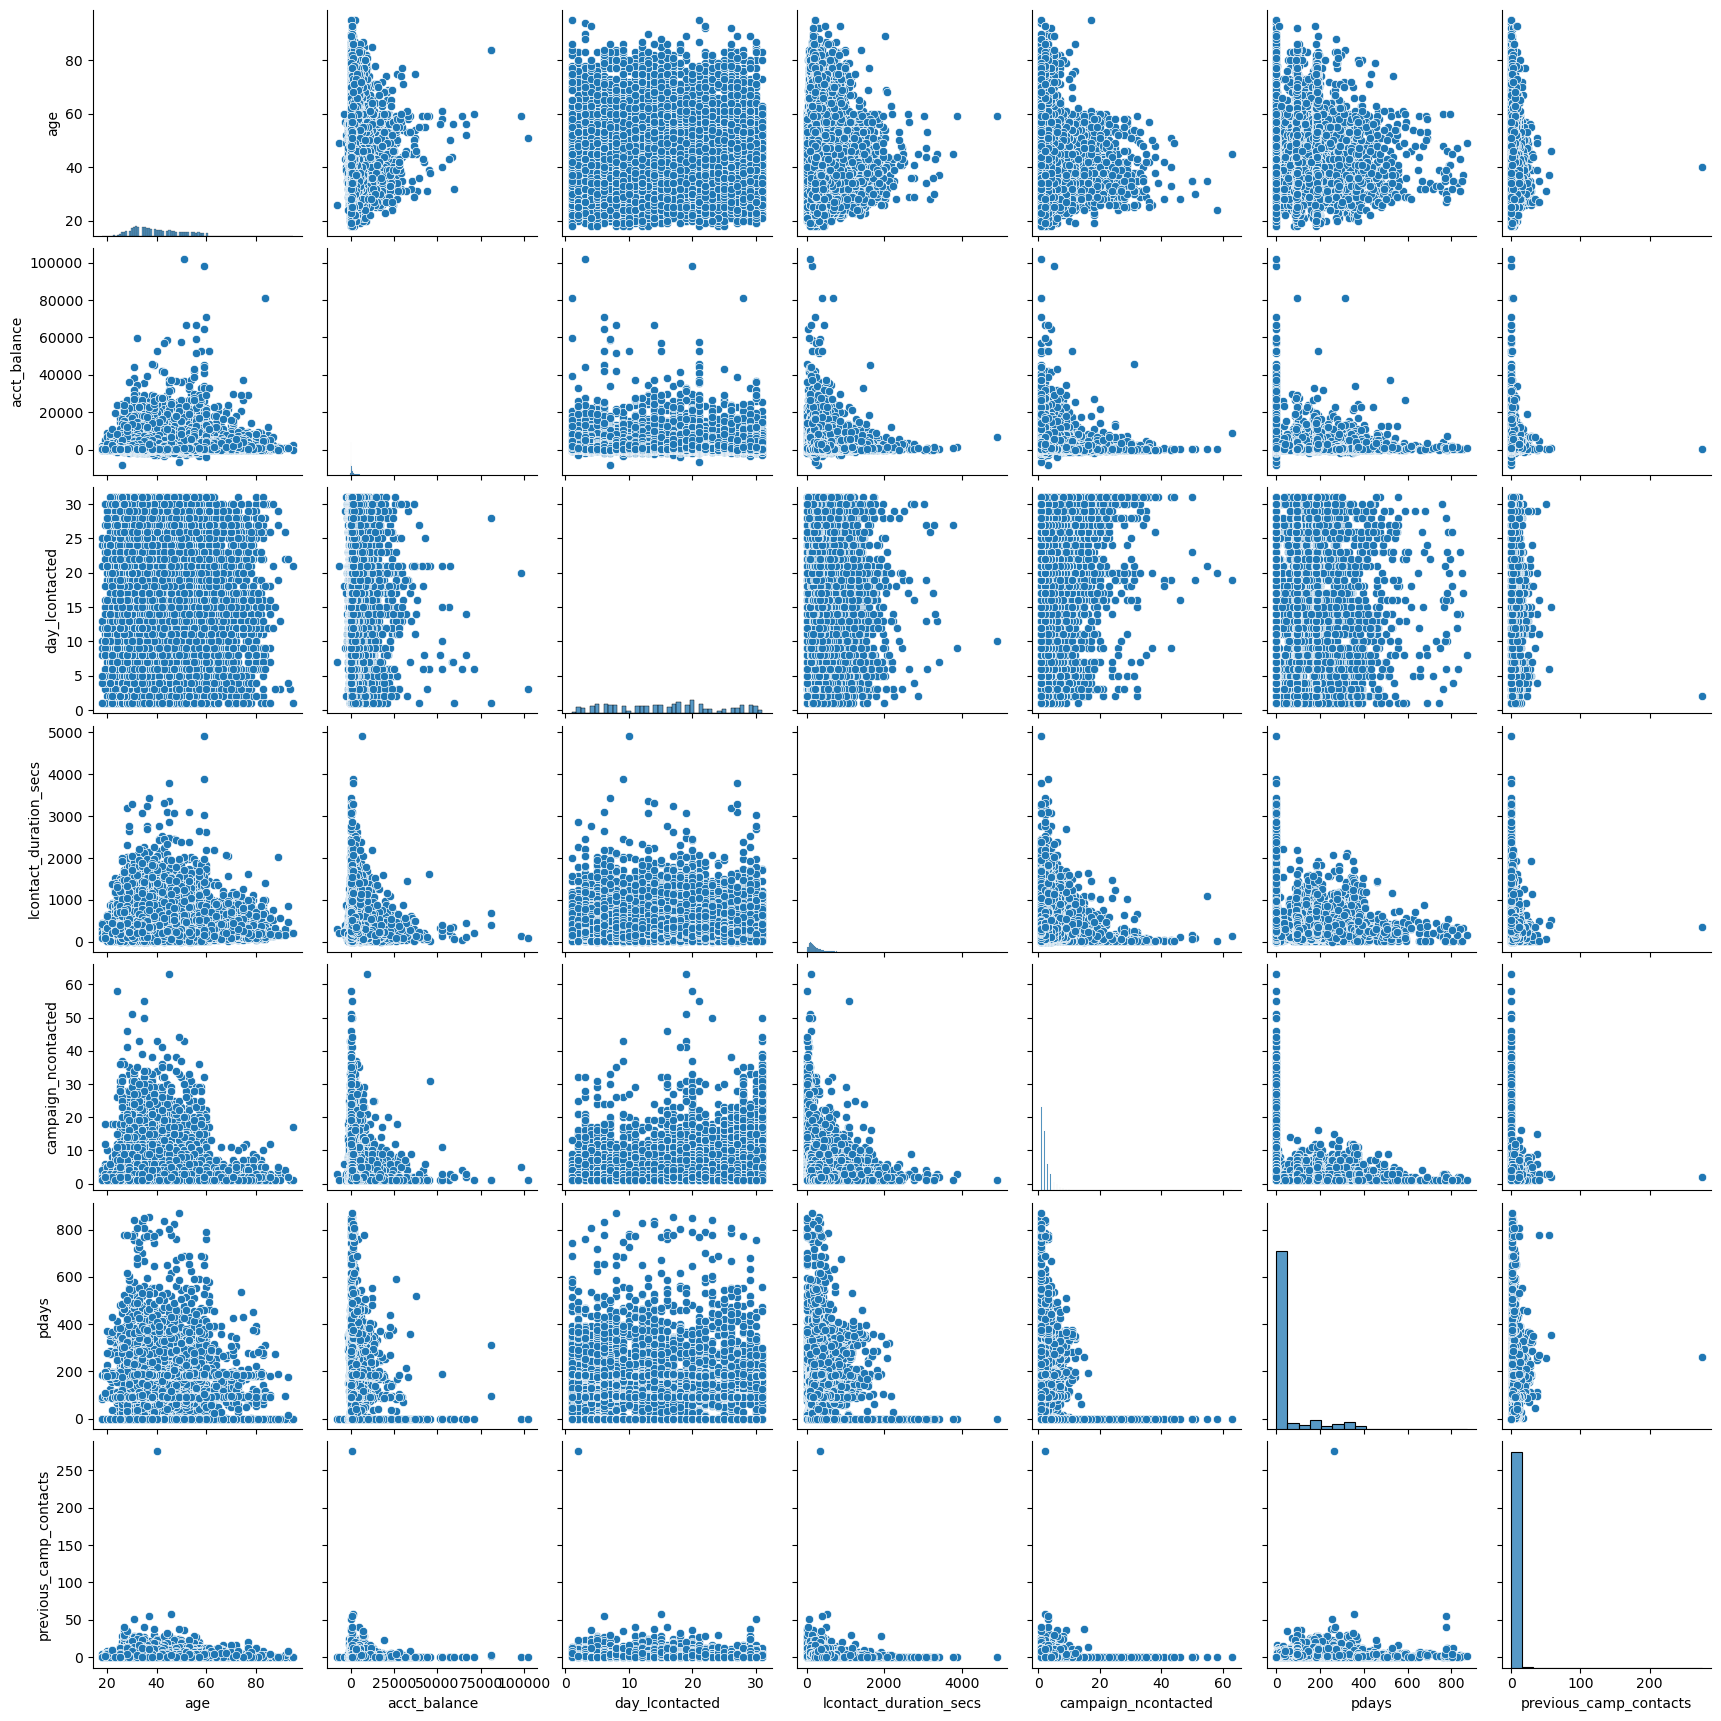

In [32]:
sns.pairplot(df)

<Figure size 1000x800 with 0 Axes>

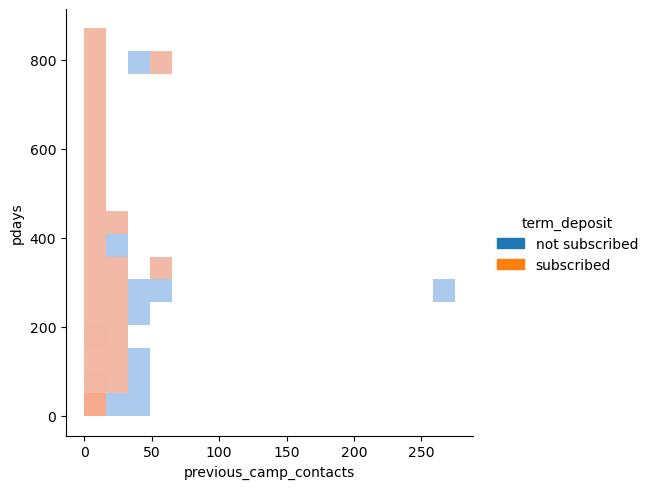

In [33]:
plt.figure(figsize=(10,8))
sns.displot(y='pdays', x='previous_camp_contacts',data=df, hue='term_deposit')

#### Insights:
#### As seen in the heatmap, there is a weak positive relationship between the days that passed after customer was last contacted and the number of call/contacts in an old campaign. Even though the days passed since they were last contacted, the people that subscribed were contacted not more than 16times, some were contacted 50 times and yet did not subscribe

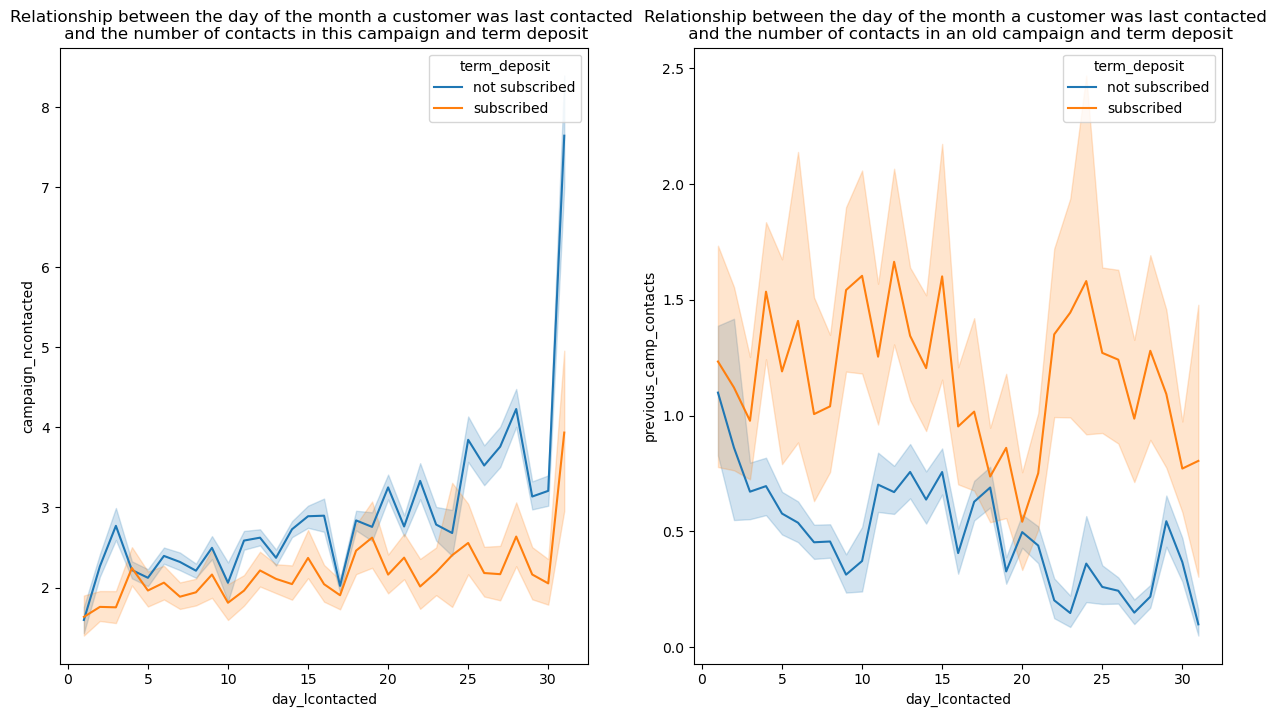

In [34]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,8))

ax=sns.lineplot(x='day_lcontacted', y='campaign_ncontacted',data=df, hue='term_deposit', ax=axs[0])
axs[0].set_title("Relationship between the day of the month a customer was last contacted \n and the number of contacts in this campaign and term deposit")

ax=sns.lineplot(x='day_lcontacted', y='previous_camp_contacts',data=df, hue='term_deposit', ax=axs[1])
axs[1].set_title("Relationship between the day of the month a customer was last contacted \n and the number of contacts in an old campaign and term deposit")

plt.show()

#### Insight:
#### In this campaign the customers that were contacted within 1 to 4 times over 1st to 31st of the month subscribed, a positive correlation was observed in the heatmap
#### In the old or previous campaign a negative correlation was seen


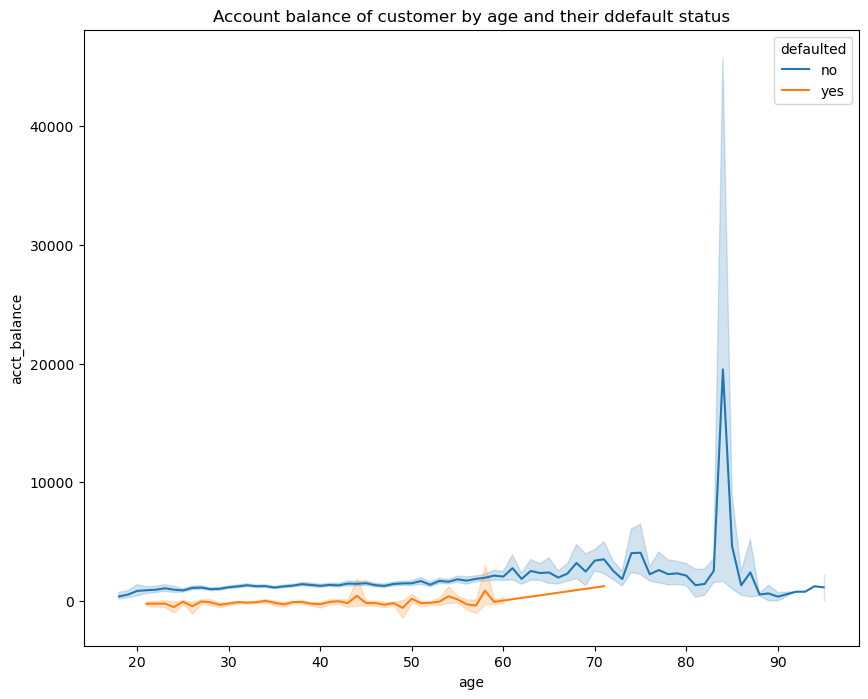

In [35]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df, x="age", y="acct_balance", hue="defaulted")
plt.title("Account balance of customer by age and their ddefault status")
plt.show()

In [36]:
df.columns

Index(['age', 'job', 'marital_status', 'education', 'defaulted',
       'acct_balance', 'housing_loan', 'personal_loan', 'mthd_contact',
       'day_lcontacted', 'month_lcontacted', 'lcontact_duration_secs',
       'campaign_ncontacted', 'pdays', 'previous_camp_contacts', 'poutcome',
       'term_deposit', 'age_group'],
      dtype='object')

# -Machine Learning 

## -Deposit Detection System - supervised machine learning
### - Split the data into independent variable(df1) and dependent variable(target)
### - Data Normalisation using MinMaxScaler
### - Encoding using label encoding
### -Train-Test Split
### - Model Building and Evaluation

In [37]:
#Creating a copy of the data without the target/label and the column that was created 
df1 = df[['age', 'job', 'marital_status', 'education', 'defaulted',
       'acct_balance', 'housing_loan', 'personal_loan', 'mthd_contact',
       'day_lcontacted', 'month_lcontacted', 'lcontact_duration_secs',
       'campaign_ncontacted', 'pdays', 'previous_camp_contacts', 'poutcome']]

target = df[['term_deposit']]   

In [38]:
target.head(2)

,term_deposit
0,not subscribed
1,not subscribed


In [39]:
df1.head(2)

,age,job,marital_status,education,defaulted,acct_balance,housing_loan,personal_loan,mthd_contact,day_lcontacted,month_lcontacted,lcontact_duration_secs,campaign_ncontacted,pdays,previous_camp_contacts,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown


#### Normalisation of the data using MinMaxScaler

In [40]:
# MinMax Scaler is used to handle the outliers
# Dropped the old columns and add the scaled ones
scaler = MinMaxScaler()  #minmaxscaler is assigned to a variable called scaler

df1["Scaled_acct_balance"] = scaler.fit_transform(df1["acct_balance"].values.reshape(-1, 1))
df1["Scaled_campaign_ncontacted"] = scaler.fit_transform(df1["campaign_ncontacted"].values.reshape(-1, 1))
df1["Scaled_pdays"] = scaler.fit_transform(df1["pdays"].values.reshape(-1, 1))
df1["Scaled_previuos_camp_contacts"] = scaler.fit_transform(df1["previous_camp_contacts"].values.reshape(-1, 1))
df1["Scaled_lcontact_duration_secs"] = scaler.fit_transform(df1["lcontact_duration_secs"].values.reshape(-1, 1))                                                                                                     

df1.drop(['lcontact_duration_secs', 'campaign_ncontacted', 'pdays', 'previous_camp_contacts', 'acct_balance'], axis=1, inplace=True)

df1.head()   

,age,job,marital_status,education,defaulted,housing_loan,personal_loan,mthd_contact,day_lcontacted,month_lcontacted,poutcome,Scaled_acct_balance,Scaled_campaign_ncontacted,Scaled_pdays,Scaled_previuos_camp_contacts,Scaled_lcontact_duration_secs
0,58,management,married,tertiary,no,yes,no,unknown,5,may,unknown,0.092259,0.0,0.0,0.0,0.053070
1,44,technician,single,secondary,no,yes,no,unknown,5,may,unknown,0.073067,0.0,0.0,0.0,0.030704
2,33,entrepreneur,married,secondary,no,yes,yes,unknown,5,may,unknown,0.072822,0.0,0.0,0.0,0.015453
3,47,blue-collar,married,unknown,no,yes,no,unknown,5,may,unknown,0.086476,0.0,0.0,0.0,0.018707
4,33,unknown,single,unknown,no,no,no,unknown,5,may,unknown,0.072812,0.0,0.0,0.0,0.040260


### Encoding - Changing all categorical data to numerical data

In [41]:
df1.dtypes

age                                int64
job                               object
marital_status                    object
education                         object
defaulted                         object
housing_loan                      object
personal_loan                     object
mthd_contact                      object
day_lcontacted                     int64
month_lcontacted                  object
poutcome                          object
Scaled_acct_balance              float64
Scaled_campaign_ncontacted       float64
Scaled_pdays                     float64
Scaled_previuos_camp_contacts    float64
Scaled_lcontact_duration_secs    float64
dtype: object

In [42]:
from sklearn.preprocessing import LabelEncoder

#label encoding to change all categorical variable to numerical

encoder = LabelEncoder()  #method initialization

#looping for columns
for i in df1.columns[1:]:
    if(df1[i].dtype =='object'):
        df1[i] = encoder.fit_transform(df1[i])
    else:
        df1[i] = df1[i]
        
df1.head()

,age,job,marital_status,education,defaulted,housing_loan,personal_loan,mthd_contact,day_lcontacted,month_lcontacted,poutcome,Scaled_acct_balance,Scaled_campaign_ncontacted,Scaled_pdays,Scaled_previuos_camp_contacts,Scaled_lcontact_duration_secs
0,58,4,1,2,0,1,0,2,5,8,3,0.092259,0.0,0.0,0.0,0.053070
1,44,9,2,1,0,1,0,2,5,8,3,0.073067,0.0,0.0,0.0,0.030704
2,33,2,1,1,0,1,1,2,5,8,3,0.072822,0.0,0.0,0.0,0.015453
3,47,1,1,3,0,1,0,2,5,8,3,0.086476,0.0,0.0,0.0,0.018707
4,33,11,2,3,0,0,0,2,5,8,3,0.072812,0.0,0.0,0.0,0.040260


In [43]:
target.dtypes

term_deposit    object
dtype: object

In [44]:
#label encoding to change all categorical variable to numerical

encoder = LabelEncoder()  #method initialization

#looping for columns
for i in target.columns[0:]:
    if(target[i].dtype =='object'):
        target[i] = encoder.fit_transform(target[i])
    else:
        target[i] = target[i]
        
target.head()

,term_deposit
0,0
1,0
2,0
3,0
4,0


### Train-Test split

In [45]:
#Its further split into train and test
X_train,X_test,y_train,y_test = train_test_split(df1,target,test_size=0.2, random_state= 0)


In [46]:
print(df1.shape)
print(target.shape)

(45211, 16)
(45211, 1)


In [47]:
#80% Train and 20% on test set
print(X_train.shape)
print(X_test.shape)

(36168, 16)
(9043, 16)


In [48]:
#80% Train and 20% on test set
print(y_train.shape)
print(y_test.shape)

(36168, 1)
(9043, 1)


In [49]:
X_train.head()

,age,job,marital_status,education,defaulted,housing_loan,personal_loan,mthd_contact,day_lcontacted,month_lcontacted,poutcome,Scaled_acct_balance,Scaled_campaign_ncontacted,Scaled_pdays,Scaled_previuos_camp_contacts,Scaled_lcontact_duration_secs
13932,57,0,0,1,0,0,0,0,10,5,3,0.078777,0.000000,0.000000,0.000000,0.147214
9894,37,11,1,3,0,0,0,2,9,6,3,0.088228,0.000000,0.000000,0.000000,0.012810
39946,35,9,0,1,0,1,0,0,2,6,0,0.098433,0.048387,0.111239,0.007273,0.020740
9217,35,0,1,1,0,1,1,2,5,6,3,0.074746,0.000000,0.000000,0.000000,0.050224
4124,38,7,2,2,0,1,0,2,19,8,3,0.075736,0.000000,0.000000,0.000000,0.028060


In [50]:
y_train.head()

,term_deposit
13932,1
9894,0
39946,0
9217,0
4124,0


### Model Building and Evaluation

In [51]:
#Deploying various machine learning algorithm
classifiers = [[SGDClassifier(), "SGD Classifier"],
              [KNeighborsClassifier(), "K-Neighbors Classifier"],
              [RandomForestClassifier(), "Random Forest Classifier"],
              [LogisticRegression(), "Logistic Regression Classifier "], 
              [XGBClassifier(), "XGB Classifier"],
              [GaussianNB(), "Naive Bayes"],
              [SVC(), "SVC"],
              [DecisionTreeClassifier(random_state=42), "Decision Tree Classifier"]
              ]

In [52]:
classifiers

[[SGDClassifier(), 'SGD Classifier'],
 [KNeighborsClassifier(), 'K-Neighbors Classifier'],
 [RandomForestClassifier(), 'Random Forest Classifier'],
 [LogisticRegression(), 'Logistic Regression Classifier '],
 [XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                predictor=None, random_state=None, ...),
  'XGB Classifier

In [53]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}
f1_list = {}

for classifier in classifiers:
    model = classifier[0] 
    model.fit(X_train, y_train)
    model_name = classifier[1]
    
    model_pred = model.predict(X_test)
    
    
    a_score = accuracy_score(y_test, model_pred)
    p_score = precision_score(y_test, model_pred)
    r_score = recall_score(y_test, model_pred)
    roc_score = roc_auc_score(y_test, model_pred)
    f1_score = 2*(p_score*r_score)/(p_score + r_score)
    
    
    
    acc_list[model_name] = ([str(round(a_score*100, 2)) + "%"])
    precision_list[model_name] = ([str(round(p_score*100, 2)) + "%"])
    recall_list[model_name] = ([str(round(r_score*100, 2)) + "%"]) 
    roc_list[model_name] = ([str(round(roc_score*100, 2)) + "%"])
    f1_list[model_name] = ([str(round(f1_score*100, 2)) + "%"])
    
    if model_name != classifiers[-1][1]:
     print("")

In [54]:
acc_list

{'SGD Classifier': ['88.47%'],
 'K-Neighbors Classifier': ['87.9%'],
 'Random Forest Classifier': ['90.01%'],
 'Logistic Regression Classifier ': ['88.48%'],
 'XGB Classifier': ['90.38%'],
 'Naive Bayes': ['83.77%'],
 'SVC': ['88.25%'],
 'Decision Tree Classifier': ['86.64%']}

In [55]:
acc = pd.DataFrame(acc_list)
acc.head()

,SGD Classifier,K-Neighbors Classifier,Random Forest Classifier,Logistic Regression Classifier,XGB Classifier,Naive Bayes,SVC,Decision Tree Classifier
0,88.47%,87.9%,90.01%,88.48%,90.38%,83.77%,88.25%,86.64%


In [56]:
precision_list

{'SGD Classifier': ['60.87%'],
 'K-Neighbors Classifier': ['44.98%'],
 'Random Forest Classifier': ['60.64%'],
 'Logistic Regression Classifier ': ['57.05%'],
 'XGB Classifier': ['61.9%'],
 'Naive Bayes': ['35.73%'],
 'SVC': ['0.0%'],
 'Decision Tree Classifier': ['43.52%']}

In [57]:
pre = pd.DataFrame(precision_list)
pre.head()

,SGD Classifier,K-Neighbors Classifier,Random Forest Classifier,Logistic Regression Classifier,XGB Classifier,Naive Bayes,SVC,Decision Tree Classifier
0,60.87%,44.98%,60.64%,57.05%,61.9%,35.73%,0.0%,43.52%


In [58]:
recall_list

{'SGD Classifier': ['5.27%'],
 'K-Neighbors Classifier': ['13.08%'],
 'Random Forest Classifier': ['42.9%'],
 'Logistic Regression Classifier ': ['8.0%'],
 'XGB Classifier': ['47.22%'],
 'Naive Bayes': ['47.7%'],
 'SVC': ['0.0%'],
 'Decision Tree Classifier': ['45.81%']}

In [59]:
recall = pd.DataFrame(recall_list)
recall.head()

,SGD Classifier,K-Neighbors Classifier,Random Forest Classifier,Logistic Regression Classifier,XGB Classifier,Naive Bayes,SVC,Decision Tree Classifier
0,5.27%,13.08%,42.9%,8.0%,47.22%,47.7%,0.0%,45.81%


In [60]:
roc_list

{'SGD Classifier': ['52.41%'],
 'K-Neighbors Classifier': ['55.47%'],
 'Random Forest Classifier': ['69.59%'],
 'Logistic Regression Classifier ': ['53.6%'],
 'XGB Classifier': ['71.68%'],
 'Naive Bayes': ['68.13%'],
 'SVC': ['50.0%'],
 'Decision Tree Classifier': ['68.95%']}

In [61]:
roc = pd.DataFrame(roc_list)
roc.head()

,SGD Classifier,K-Neighbors Classifier,Random Forest Classifier,Logistic Regression Classifier,XGB Classifier,Naive Bayes,SVC,Decision Tree Classifier
0,52.41%,55.47%,69.59%,53.6%,71.68%,68.13%,50.0%,68.95%


In [62]:
f1_list

{'SGD Classifier': ['9.7%'],
 'K-Neighbors Classifier': ['20.26%'],
 'Random Forest Classifier': ['50.25%'],
 'Logistic Regression Classifier ': ['14.03%'],
 'XGB Classifier': ['53.58%'],
 'Naive Bayes': ['40.85%'],
 'SVC': ['nan%'],
 'Decision Tree Classifier': ['44.64%']}

In [63]:
f1 = pd.DataFrame(f1_list)
f1.head()

,SGD Classifier,K-Neighbors Classifier,Random Forest Classifier,Logistic Regression Classifier,XGB Classifier,Naive Bayes,SVC,Decision Tree Classifier
0,9.7%,20.26%,50.25%,14.03%,53.58%,40.85%,nan%,44.64%


In [64]:
#To join the tables
all_models = pd.concat([acc, pre, recall, roc, f1])
all_models

,SGD Classifier,K-Neighbors Classifier,Random Forest Classifier,Logistic Regression Classifier,XGB Classifier,Naive Bayes,SVC,Decision Tree Classifier
0,88.47%,87.9%,90.01%,88.48%,90.38%,83.77%,88.25%,86.64%
0,60.87%,44.98%,60.64%,57.05%,61.9%,35.73%,0.0%,43.52%
0,5.27%,13.08%,42.9%,8.0%,47.22%,47.7%,0.0%,45.81%
0,52.41%,55.47%,69.59%,53.6%,71.68%,68.13%,50.0%,68.95%
0,9.7%,20.26%,50.25%,14.03%,53.58%,40.85%,nan%,44.64%


In [65]:
all_models.insert(0, "Evaluation Metrics", ["accuracy", "precision", "recall", "roc", "f1_score"], True)

In [66]:
all_models.head()

,Evaluation Metrics,SGD Classifier,K-Neighbors Classifier,Random Forest Classifier,Logistic Regression Classifier,XGB Classifier,Naive Bayes,SVC,Decision Tree Classifier
0,accuracy,88.47%,87.9%,90.01%,88.48%,90.38%,83.77%,88.25%,86.64%
0,precision,60.87%,44.98%,60.64%,57.05%,61.9%,35.73%,0.0%,43.52%
0,recall,5.27%,13.08%,42.9%,8.0%,47.22%,47.7%,0.0%,45.81%
0,roc,52.41%,55.47%,69.59%,53.6%,71.68%,68.13%,50.0%,68.95%
0,f1_score,9.7%,20.26%,50.25%,14.03%,53.58%,40.85%,nan%,44.64%


#### As stated earlier the data is imbalanced and hence accuracy metrics wouldn't be the right metrics to use in the evaluation. I used f1_score(which is a combination of precision and recall) and confusion matrix to arrive at the best model. XGB Classifier and Random Forest Classifier had the highest f1_score as seen above. 

#### Confusion Matrix of XGB Classifier and  Random Forest classifier

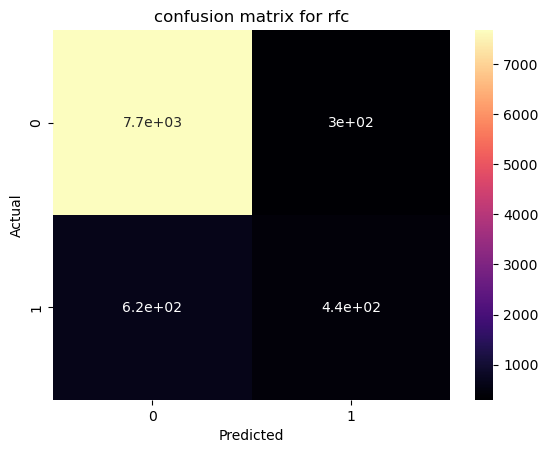

In [67]:
#create a confusion matrix for rfc
rfc = RandomForestClassifier()           

rfc.fit(X_train, y_train)
ly_pred = rfc.predict(X_test)
rfc = confusion_matrix(y_test, ly_pred)

#visualise the confusion matrix
sns.heatmap(rfc, annot=True, cmap="magma")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("confusion matrix for rfc")
plt.show()

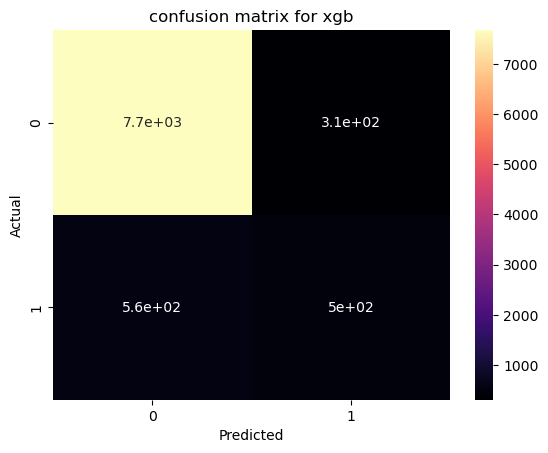

In [68]:
#create a confusion matrix for xgb
xgb = XGBClassifier()           

xgb.fit(X_train, y_train)
ly_pred = xgb.predict(X_test)
xgb = confusion_matrix(y_test, ly_pred)

#visualise the confusion matrix
sns.heatmap(xgb, annot=True, cmap="magma")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("confusion matrix for xgb")
plt.show()

#####  The lower the FN that is false negative (type 2 error ) the better the model . Therefore the best model here is the XGB Classifier, the false negative is 560 and its f1_score is 53%



### Customer Segmentation -unsupervised learning

In [69]:
df.head(2)

,age,job,marital_status,education,defaulted,acct_balance,housing_loan,personal_loan,mthd_contact,day_lcontacted,month_lcontacted,lcontact_duration_secs,campaign_ncontacted,pdays,previous_camp_contacts,poutcome,term_deposit,age_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,not subscribed,56-70 elderly
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,not subscribed,41-55 old adult


In [70]:
# MinMax Scaler is used to handle the outliers
# Dropped the old columns and add the scaled ones
scaler = MinMaxScaler()  #minmaxscaler is assigned to a variable called scaler

df["Scaled_acct_balance"] = scaler.fit_transform(df["acct_balance"].values.reshape(-1, 1))
df["Scaled_campaign_ncontacted"] = scaler.fit_transform(df["campaign_ncontacted"].values.reshape(-1, 1))
df["Scaled_pdays"] = scaler.fit_transform(df["pdays"].values.reshape(-1, 1))
df["Scaled_previous_camp_contacts"] = scaler.fit_transform(df["previous_camp_contacts"].values.reshape(-1, 1))
df["Scaled_lcontact_duration_secs"] = scaler.fit_transform(df["lcontact_duration_secs"].values.reshape(-1, 1))                                                                                                     

df.drop(['lcontact_duration_secs', 'campaign_ncontacted', 'pdays', 'previous_camp_contacts', 'acct_balance'], axis=1, inplace=True)

df.head()   

,age,job,marital_status,education,defaulted,housing_loan,personal_loan,mthd_contact,day_lcontacted,month_lcontacted,poutcome,term_deposit,age_group,Scaled_acct_balance,Scaled_campaign_ncontacted,Scaled_pdays,Scaled_previous_camp_contacts,Scaled_lcontact_duration_secs
0,58,management,married,tertiary,no,yes,no,unknown,5,may,unknown,not subscribed,56-70 elderly,0.092259,0.0,0.0,0.0,0.053070
1,44,technician,single,secondary,no,yes,no,unknown,5,may,unknown,not subscribed,41-55 old adult,0.073067,0.0,0.0,0.0,0.030704
2,33,entrepreneur,married,secondary,no,yes,yes,unknown,5,may,unknown,not subscribed,26-40 adult,0.072822,0.0,0.0,0.0,0.015453
3,47,blue-collar,married,unknown,no,yes,no,unknown,5,may,unknown,not subscribed,41-55 old adult,0.086476,0.0,0.0,0.0,0.018707
4,33,unknown,single,unknown,no,no,no,unknown,5,may,unknown,not subscribed,26-40 adult,0.072812,0.0,0.0,0.0,0.040260


In [71]:
#Convert all categorical data to numerical data

from sklearn.preprocessing import LabelEncoder

#label encoding
encoder = LabelEncoder()  #method initialization

#looping for columns except survived
for i in df.columns[1:]:
    if(df[i].dtype =='object'):
        df[i] = encoder.fit_transform(df[i])
    else:
        df[i] = df[i]
        
df.head()        
      

,age,job,marital_status,education,defaulted,housing_loan,personal_loan,mthd_contact,day_lcontacted,month_lcontacted,poutcome,term_deposit,age_group,Scaled_acct_balance,Scaled_campaign_ncontacted,Scaled_pdays,Scaled_previous_camp_contacts,Scaled_lcontact_duration_secs
0,58,4,1,2,0,1,0,2,5,8,3,0,2,0.092259,0.0,0.0,0.0,0.053070
1,44,9,2,1,0,1,0,2,5,8,3,0,1,0.073067,0.0,0.0,0.0,0.030704
2,33,2,1,1,0,1,1,2,5,8,3,0,0,0.072822,0.0,0.0,0.0,0.015453
3,47,1,1,3,0,1,0,2,5,8,3,0,1,0.086476,0.0,0.0,0.0,0.018707
4,33,11,2,3,0,0,0,2,5,8,3,0,0,0.072812,0.0,0.0,0.0,0.040260


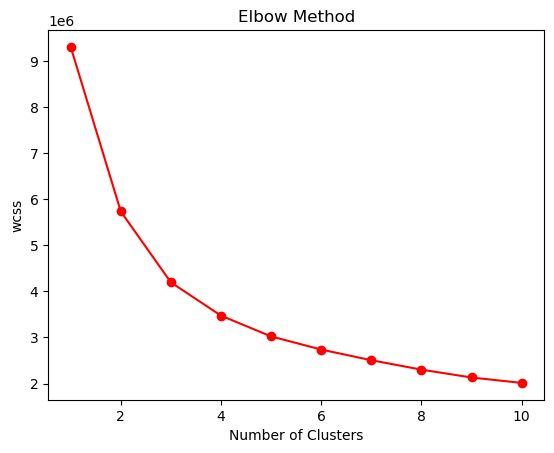

In [72]:
#To group the customers into differnt segments, lets define the number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, color="red", marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")
plt.show()

In [73]:
# 3 clusters is optimal..fit the kmeans clustering model
kmeans = KMeans(n_clusters=2, init="k-means++", random_state=42)
kmeans.fit(df)

#Add cluster labels to df
df["Cluster"] = kmeans.labels_

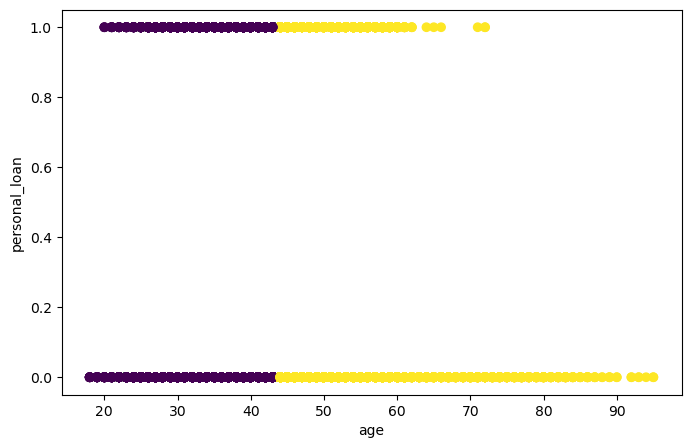

0.3447155627898971

In [74]:
#visualize cluster results
plt.figure(figsize=(8,5))
plt.scatter(df["age"], df["personal_loan"], c=df["Cluster"], label= "Centroids")
plt.xlabel("age")
plt.ylabel("personal_loan")
plt.show()

#calculate silhouette score
from sklearn.metrics import silhouette_score

silhouette_score(df, kmeans.labels_)

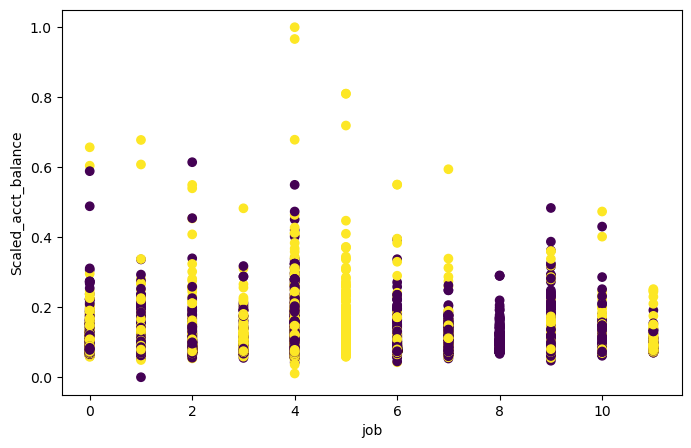

0.3447155627898971

In [75]:
#visualize cluster results
plt.figure(figsize=(8,5))
plt.scatter(df["job"], df["Scaled_acct_balance"], c=df["Cluster"], label= "Centroids")
plt.xlabel("job")
plt.ylabel("Scaled_acct_balance")
plt.show()

#calculate silhouette score
from sklearn.metrics import silhouette_score

silhouette_score(df, kmeans.labels_)

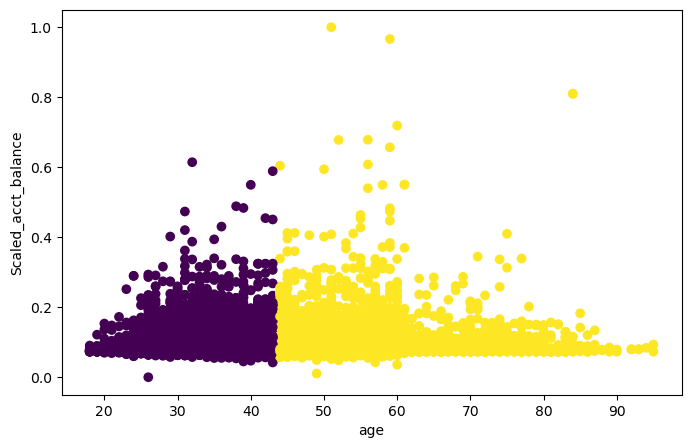

0.3447155627898971

In [76]:
plt.figure(figsize=(8,5))
plt.scatter(df["age"], df["Scaled_acct_balance"], c=df["Cluster"], label= "Centroids")
plt.xlabel("age")
plt.ylabel("Scaled_acct_balance")

plt.show()



silhouette_score(df, kmeans.labels_)

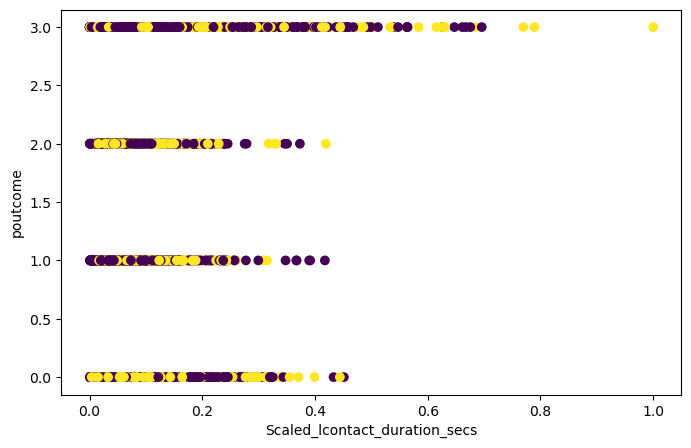

0.3447155627898971

In [77]:
plt.figure(figsize=(8,5))
plt.scatter(df["Scaled_lcontact_duration_secs"], df["poutcome"], c=df["Cluster"], label= "Centroids")
plt.xlabel("Scaled_lcontact_duration_secs")
plt.ylabel("poutcome")
plt.show()


#calculate silhouette score
from sklearn.metrics import silhouette_score

silhouette_score(df, kmeans.labels_)

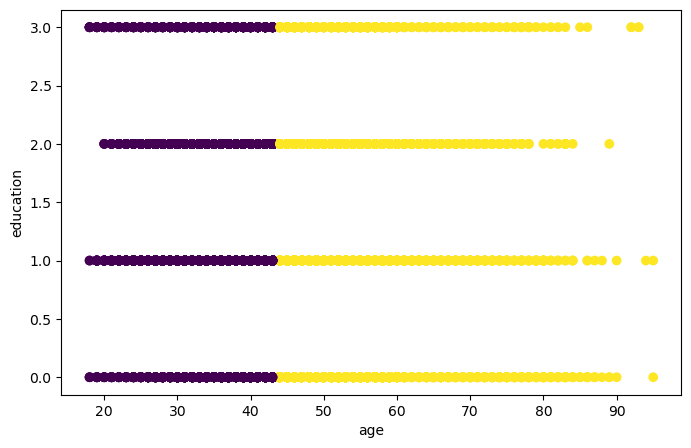

0.3447155627898971

In [78]:
plt.figure(figsize=(8,5))
plt.scatter(df["age"], df["education"], c=df["Cluster"], label= "Centroids")
plt.xlabel("age")
plt.ylabel("education")

plt.show()



silhouette_score(df, kmeans.labels_)

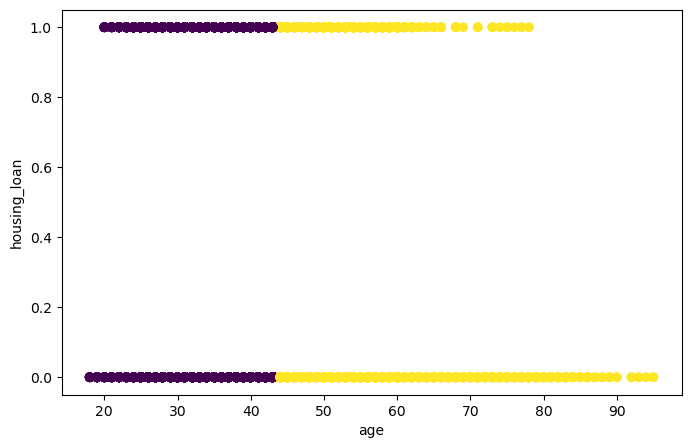

0.3447155627898971

In [79]:
plt.figure(figsize=(8,5))
plt.scatter(df["age"], df["housing_loan"], c=df["Cluster"], label= "Centroids")
plt.xlabel("age")
plt.ylabel("housing_loan")
plt.show()

#calculate silhouette score
from sklearn.metrics import silhouette_score

silhouette_score(df, kmeans.labels_)

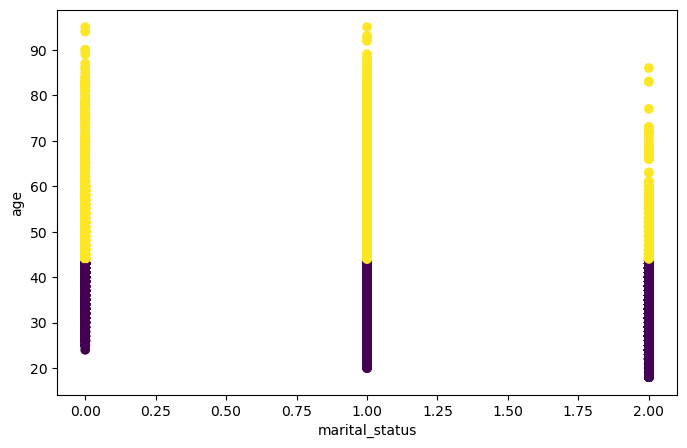

0.3447155627898971

In [80]:
plt.figure(figsize=(8,5))
plt.scatter(df["marital_status"], df["age"], c=df["Cluster"], label= "Centroids")
plt.xlabel("marital_status")
plt.ylabel("age")
plt.show()

#calculate silhouette score
from sklearn.metrics import silhouette_score

silhouette_score(df, kmeans.labels_)

In [81]:
#df["job"].value_counts(10)

In [82]:
#df_copy["job"].value_counts(10)

In [83]:
df["marital_status"].value_counts(3)

1    0.601933
2    0.282896
0    0.115171
Name: marital_status, dtype: float64

In [84]:
df_copy["marital_status"].value_counts(3)

married     0.601933
single      0.282896
divorced    0.115171
Name: marital_status, dtype: float64

In [85]:
df["education"].value_counts(4)

1    0.513194
2    0.294198
0    0.151534
3    0.041074
Name: education, dtype: float64

In [86]:
df_copy["education"].value_counts(4)

secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: education, dtype: float64


### Number of clusters was defined using the Elbow method, 2 clusters was used because it gave a higher silhouette coefficient of 0.3447, compared to using 3 clusters.

### Cluster 1- No personal loan, 43year-old and above, Retired, housemaid, married, have money in account
### Cluster 2- No personal loan, 18-42year-old, Students, Single, primary and secondary as highest level of education



## Recommendations
### Base on the insights above: - 

#### The bank should have customised products that will serve the clusters of customers e.g student/school fees term-deposit for the students and retirement term deposit for the aged/retired people. With this the bank will be able to meet the needs off targetted customers and also get new customers to save with the bank

#### In this campaign the customers that were contacted within 1 to 4 times over 1st to 31st of the month subscribed to term-deposit, therefore its advisable to limit the marketing campaign calls to less than 4 to avoid unproductive call and minimise cost of marketing.

#### A short term maturity term-deposit should be packaged for those in the low income earners cadre


## Challenges

### Information on the Income status of the customers were not provider, This would have enabled one to understand their spending capacity.